# TELECOM CASE STUDY

## Case Study Objective Overview

In the telecom industry, customers are able to choose from multiple service providers 
and actively switch from one operator to another. In this highly competitive market, 
the telecommunications industry experiences an average of 15-25% annual churn rate. 
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
customer retention has now become even more important than customer acquisition.

### Definition of Churn

There are various ways to define churn, such as:

<b>Revenue-based churn:</b> Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

<b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### High-value Customer

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Customer Behaviour

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are <b>three phases</b> of customer lifecycle :

1. The <b>‘good’ phase:</b> In this phase, the customer is happy with the service and behaves as usual.

2. The <b>‘action’ phase:</b> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The <b>‘churn’ phase:</b> In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

## `Business Objective`

The <b>business objective</b> is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Steps involved:
1. Step-1 : Reading and Understanding Dataset
2. Step-2 : Preparing Dataset
3. Step-3 : Cleaning Dataset
4. Step-4 : Visualizing Dataset
5. Step-5 : Dealing with Outliers
6. Step-6 : Preparing Dataset for Modeling
7. Step-7 : Model Building and Evaluating
8. Step-8 : Outcome/Report

## Step-1: Reading and Understanding Dataset

In [1]:
# Installing plotly
! pip install plotly

In [2]:
# Importing Library

# For Reading Dataset
import pandas as pd
import numpy as np

# For Checking encoding
import chardet

# For Visualizing Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For suppress warning
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Checking encoding
with open(r'telecom_churn_data.csv','rb') as data:
    print(chardet.detect(data.read(2000)))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
# Reading Dataset
telecom_churn_orignal = pd.read_csv(r'telecom_churn_data.csv', encoding='palmos')
telecom_churn_orignal.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [5]:
# Shape of dataset
telecom_churn_orignal.shape

(99999, 226)

In [6]:
# Info of dataset
telecom_churn_orignal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 167.8+ MB


In [7]:
# Statistic Description
telecom_churn_orignal.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [8]:
# Checking Null value percentage
pd.set_option('display.max_rows',None)
round(100*(telecom_churn_orignal.isnull().sum()/len(telecom_churn_orignal.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Step-2 : Preparing Dataset

#### First we determine High value Customer, so that the while treating missing value it take less time to compute.

In [9]:
# Copying dataset
telecom_churn = telecom_churn_orignal.copy()

In [10]:
# Checking null value for columns
col = ['total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_rech_amt_6', 'total_rech_amt_7']
telecom_churn[col].isnull().sum()

total_rech_data_6     74846
total_rech_data_7     74428
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
total_rech_amt_6          0
total_rech_amt_7          0
dtype: int64

#### Dealing with missing value

1. Column `total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'`

In [11]:
# Creating list
col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']
# Checking 5 sample 
telecom_churn[col].sample(5)

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
74336                NaN                NaN                NaN   
77928                1.0                2.0                1.0   
38447                NaN                NaN                NaN   
55771                NaN                NaN                NaN   
94625                NaN                6.0                2.0   

       total_rech_data_9  
74336                NaN  
77928                3.0  
38447                NaN  
55771                NaN  
94625                3.0

In [12]:
# Checking info
telecom_churn[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_rech_data_6  25153 non-null  float64
 1   total_rech_data_7  25571 non-null  float64
 2   total_rech_data_8  26339 non-null  float64
 3   total_rech_data_9  25922 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


Assiging null value to 0 for the column `'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'` for month june, july, aug, and sept.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [13]:
# Assigning value
telecom_churn[col] = telecom_churn[col].fillna(0.0)
# Checking head
telecom_churn[col].head()

total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9
0                1.0                1.0                1.0                0.0
1                0.0                1.0                2.0                0.0
2                0.0                0.0                0.0                1.0
3                0.0                0.0                0.0                0.0
4                1.0                0.0                0.0                0.0

2. Column `av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'`

In [14]:
# Creating list
col = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
# Checking 5 sample 
telecom_churn[col].head()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 NaN               154.0                50.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                56.0                 NaN                 NaN   

   av_rech_amt_data_9  
0                 NaN  
1                 NaN  
2                46.0  
3                 NaN  
4                 NaN

Assiging null value to mean for the column `'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'` for month june, july, aug, and sept.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [15]:
# Assigning value
for i in col:
    telecom_churn[i].fillna(round(telecom_churn[i].mean(),2), inplace= True)
# Checking head
telecom_churn[col].head()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0              252.00              252.00   
1               192.6              154.00               50.00   
2               192.6              200.98              197.53   
3               192.6              200.98              197.53   
4                56.0              200.98              197.53   

   av_rech_amt_data_9  
0              192.73  
1              192.73  
2               46.00  
3              192.73  
4              192.73

#### New Feature can be
1. Total_data_rech = total_rech_data + av_rech_amt_data
2. Recharge_amt = Total_data_rech + total_rech_amt
3. Avg_Rech_Amt = (Avg_Rech_Amt_6 + Avg_Rech_Amt_7)/2 
##### For determining High value customer

In [16]:
# Determining New Feature

# 1. "Total_Data_Rech"
telecom_churn["Total_Data_Rech_6"] = telecom_churn["total_rech_data_6"] * telecom_churn["av_rech_amt_data_6"]
telecom_churn["Total_Data_Rech_7"] = telecom_churn["total_rech_data_7"] * telecom_churn["av_rech_amt_data_7"]
# avg_rech_amt_data = data_rech/ total_rech_data

# 2. "Total_Recharge_Amt" (call + data)
telecom_churn["Total_Recharge_Amt_6"] = telecom_churn["total_rech_amt_6"] + telecom_churn["Total_Data_Rech_6"]
telecom_churn["Total_Recharge_Amt_7"] = telecom_churn["total_rech_amt_7"] + telecom_churn["Total_Data_Rech_7"]

# 3. "Avg_Rech_Amt" = average("Total_Recharge_Amt_6" + "Total_Recharge_Amt_7")
telecom_churn["Avg_Rech_Amt"] = (telecom_churn["Total_Recharge_Amt_6"] + telecom_churn["Total_Recharge_Amt_7"])/2

In [17]:
# Dropping column
telecom_churn.drop(columns=["Total_Data_Rech_6", "Total_Data_Rech_7", "Total_Recharge_Amt_6", "Total_Recharge_Amt_7"], inplace=True)

In [18]:
# Checking shape
telecom_churn.shape

(99999, 227)

### Taking High Value customer

In [19]:
# Taking Avg_Rech_Amt greater or equal to 70th Percentile
print("Cut-Off Amount : {}".format(telecom_churn["Avg_Rech_Amt"].quantile(0.70)))

Cut-Off Amount : 478.0


In [20]:
# Creating new dataframe
telecom_churn_filter = telecom_churn[telecom_churn["Avg_Rech_Amt"]>=telecom_churn["Avg_Rech_Amt"].quantile(0.7)]
telecom_churn_filter.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  fb_user_6  fb_user_7  fb_user_8  \
0             9/30/2014   197.385  ...        1.0        1.0        1.0   
7             9/30/2014  1069.180  ...        NaN        NaN        NaN   
8             9/30/2014   378.721  ...        NaN        1.0        1.0   
21            9/30/2014   514.453  ...        NaN        NaN        NaN   
23            9/30/2014    74.350  ...        NaN        1.0        1.0   

    fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0         NaN  968       30.40        0.00      101.20        3.58   
7         NaN  802       57.74       19.38       18.74        0.00   
8         NaN  315       21.03      910.65      122.16        0.00   
21        NaN  720        0.00        0.00        0.00        0.00   
23        1.0  604       40.45       51.86        0.00        0.00   

    Avg_Rech_Amt  
0          559.0  
7         1185.0  
8          696.0  
21         640.0  
23         583.0  

[5 rows x 227 columns]

In [21]:
# Resetting index
telecom_churn_filter.reset_index(drop=True, inplace=True)
telecom_churn_filter.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6  ...  fb_user_6  fb_user_7  fb_user_8  \
0            9/30/2014   197.385  ...        1.0        1.0        1.0   
1            9/30/2014  1069.180  ...        NaN        NaN        NaN   
2            9/30/2014   378.721  ...        NaN        1.0        1.0   
3            9/30/2014   514.453  ...        NaN        NaN        NaN   
4            9/30/2014    74.350  ...        NaN        1.0        1.0   

   fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0        NaN  968       30.40        0.00      101.20        3.58   
1        NaN  802       57.74       19.38       18.74        0.00   
2        NaN  315       21.03      910.65      122.16        0.00   
3        NaN  720        0.00        0.00        0.00        0.00   
4        1.0  604       40.45       51.86        0.00        0.00   

   Avg_Rech_Amt  
0         559.0  
1        1185.0  
2         696.0  
3         640.0  
4         583.0  

[5 rows x 227 columns]

In [22]:
# Dropping "Avg_Rech_Amt" column
telecom_churn_filter.drop(columns='Avg_Rech_Amt', inplace=True)

In [23]:
# Checking shape
telecom_churn_filter.shape

(30001, 226)

#### Create a new feature

1. Merging count of recharge data of 2g and 3g for each month

In [24]:
# Checking null value for column count_rech_2g and count_rech_3g
col = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
      'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9']
# Null value
telecom_churn_filter[col].isnull().sum()

count_rech_2g_6    13245
count_rech_2g_7    12944
count_rech_2g_8    14048
count_rech_2g_9    14781
count_rech_3g_6    13245
count_rech_3g_7    12944
count_rech_3g_8    14048
count_rech_3g_9    14781
dtype: int64

In [25]:
# Treating missing value
# Assigning null value to 0

for i in col:
    telecom_churn_filter[i].fillna(0.0, inplace=True)
# Checking head
telecom_churn_filter[col].head()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              2.0              3.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  
0              1.0              1.0              1.0              0.0  
1              0.0              0.0              0.0              0.0  
2              0.0              0.0              0.0              0.0  
3              0.0              0.0              0.0              0.0  
4              0.0              2.0              2.0              1.0

In [26]:
# Creating new feature for count_data_rech for month 6 and  7
telecom_churn_filter["Count_data_rech_6"] = telecom_churn_filter['count_rech_2g_6'] + telecom_churn_filter['count_rech_3g_6']
telecom_churn_filter["Count_data_rech_7"] = telecom_churn_filter['count_rech_2g_7'] + telecom_churn_filter['count_rech_3g_7']
telecom_churn_filter["Count_data_rech_8"] = telecom_churn_filter['count_rech_2g_8'] + telecom_churn_filter['count_rech_3g_8']
telecom_churn_filter["Count_data_rech_9"] = telecom_churn_filter['count_rech_2g_9'] + telecom_churn_filter['count_rech_3g_9']

1. Merging volumne of recharge data of 2g and 3g for each month

In [27]:
# Creating new feature volume for column vol_2g_mb and vol_3g_mb
col = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 
      'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']
# Checking null value
telecom_churn_filter[col].isnull().sum()

vol_2g_mb_6    0
vol_2g_mb_7    0
vol_2g_mb_8    0
vol_2g_mb_9    0
vol_3g_mb_6    0
vol_3g_mb_7    0
vol_3g_mb_8    0
vol_3g_mb_9    0
dtype: int64

In [28]:
# Creating new feature volume_data_mb for month 6 and  7
telecom_churn_filter["Vol_data_mb_6"] = telecom_churn_filter['vol_2g_mb_6'] + telecom_churn_filter['vol_3g_mb_6']
telecom_churn_filter["Vol_data_mb_7"] = telecom_churn_filter['vol_2g_mb_7'] + telecom_churn_filter['vol_3g_mb_7']
telecom_churn_filter["Vol_data_mb_8"] = telecom_churn_filter['vol_2g_mb_8'] + telecom_churn_filter['vol_3g_mb_8']
telecom_churn_filter["Vol_data_mb_9"] = telecom_churn_filter['vol_2g_mb_9'] + telecom_churn_filter['vol_3g_mb_9']

In [29]:
# Dropping column vol_2g_mb, vol_3g_mb, count_rech_2g, count_rech_3g
col = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 
      'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9',
      'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
      'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9']
telecom_churn_filter.drop(columns=col, inplace=True)

In [30]:
# Checking shape
telecom_churn_filter.shape

(30001, 218)

### Assiging Churn column

In [31]:
# Assiging column churn either 1 or 0
# As per Problem statement
# If "total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"

telecom_churn_filter["Churn"] = telecom_churn_filter['total_og_mou_9'] + telecom_churn_filter['total_ic_mou_9'] + telecom_churn_filter["Vol_data_mb_9"]

telecom_churn_filter["Churn"] = telecom_churn_filter["Churn"].apply(lambda x: 0 if x>0 else 1)
# using "Vol_data_mb_9" = "vol_2g_mb_9" + "vol_3g_mb_9"
telecom_churn_filter["Churn"].head()

0    1
1    1
2    0
3    0
4    0
Name: Churn, dtype: int64

In [32]:
# Dropping columns (all attributes having ‘ _9’, etc. in their names)
month_9_col = []

for i in telecom_churn_filter.columns:
    if "_9" in i:
        month_9_col.append(i)
month_9_col

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'Count_data_rech_9',
 'Vol_data_mb_9']

In [33]:
# Dropping month column
telecom_churn_filter.drop(columns=month_9_col, inplace=True)
telecom_churn_filter.drop(columns='sep_vbc_3g', inplace=True)
# Checking shape
telecom_churn_filter.shape

(30001, 166)

In [34]:
# Calculating percentage of churn
telecom_churn_filter["Churn"].sum()/len(telecom_churn_filter.index)*100

8.136395453484884

In [35]:
# Checking head
pd.set_option('display.max_columns',None)
telecom_churn_filter.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   197.385   
1            6/30/2014            7/31/2014            8/31/2014  1069.180   
2            6/30/2014            7/31/2014            8/31/2014   378.721   
3            6/30/2014            7/31/2014            8/31/2014   514.453   
4            6/30/2014            7/31/2014            8/31/2014    74.350   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803          NaN          NaN         0.00           NaN   
1  1349.850  3171.480        57.84        54.68        52.29        453.43   
2   492.223   137.362       413.69       351.03        35.08         94.66   
3   597.753   637.760       102.41       132.11        85.14        757.93   
4   193.897   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4 

## Step-3 : Cleaning Dataset

In [36]:
# Checking null percentage
round(100*(telecom_churn_filter.isnull().sum()/len(telecom_churn_filter.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [37]:
# Checking column which has null value greater than 0%

col_0_null = []
for each_col in telecom_churn_filter.columns:
    if round(100*(telecom_churn_filter[each_col].isnull().sum()/len(telecom_churn_filter.index)),2) > 0:
        col_0_null.append(each_col)
# Printing column which has more than 0% null value
col_0_null

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou

##### Note: each month = (month_6, month_7 and month_8)
Columns are: 
   1. loc_og_t2o_mou
   2. std_og_t2o_mou
   3. loc_ic_t2o_mou
   4. last_date_of_month (for month july , aug )
   5. onnet_mou (for each month)
   6. offnet_mou (for each month)
   7. roam_ic_mou (for each month)
   8. roam_og_mou (for each month)
   9. loc_og_t2t_mou (for each month)
   10. loc_og_t2m_mou (for each month)
   11. loc_og_t2f_mou (for each month)
   12. loc_og_t2c_mou (for each month)
   13. loc_og_mou (for each month)
   14. std_og_t2t_mou (for each month)
   15. std_og_t2m_mou (for each month)
   16. std_og_t2f_mou (for each month)
   17. std_og_t2c_mou (for each month)
   18. std_og_mou (for each month)
   19. isd_og_mou (for each month)
   20. spl_og_mou (for each month)
   21. og_others (for each month)
   22. loc_ic_t2t_mou (for each month)
   23. loc_ic_t2m_mou (for each month)
   24. loc_ic_t2f_mou (for each month)
   25. loc_ic_mou (for each month)
   26. std_ic_t2t_mou (for each month)
   27. std_ic_t2m_mou (for each month)
   28. std_ic_t2f_mou (for each month)
   29. std_ic_t2o_mou (for each month)
   30. std_ic_mou (for each month)
   31. isd_ic_mou (for each month)
   32. ic_others (for each month)
   33. date_of_last_rech (for each month)
   34. spl_ic_mou (for each month)
   35. date_of_last_rech_data (for each month)
   36. max_rech_data (for each month)
   37. arpu_3g (for each month)
   38. arpu_2g (for each month)
   39. night_pck_user (for each month)
   40. fb_user (for each month)

1. Dealing with `loc_og_t2o_mou`

In [38]:
# Checking columns
telecom_churn_filter['loc_og_t2o_mou'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: loc_og_t2o_mou, dtype: float64

In [39]:
# Checking statistic description
telecom_churn_filter['loc_og_t2o_mou'].describe()

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the value is 0.

In [40]:
# Assiging null value to 0
telecom_churn_filter['loc_og_t2o_mou'].fillna(0,inplace = True)
# Checking null value
telecom_churn_filter['loc_og_t2o_mou'].isnull().sum()

0

2. Dealing with `std_og_t2o_mou`

In [41]:
# Checking column
telecom_churn_filter['std_og_t2o_mou'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: std_og_t2o_mou, dtype: float64

In [42]:
# Checking statistic description
telecom_churn_filter['std_og_t2o_mou'].describe()

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the value is 0.

In [43]:
# Assiging null value to 0
telecom_churn_filter['std_og_t2o_mou'].fillna(0,inplace = True)
# Checking null value
telecom_churn_filter['std_og_t2o_mou'].isnull().sum()

0

3. Dealing with `loc_ic_t2o_mou`

In [44]:
# Checking column
telecom_churn_filter['loc_ic_t2o_mou'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: loc_ic_t2o_mou, dtype: float64

In [45]:
# Checking statistic description
telecom_churn_filter['loc_ic_t2o_mou'].describe()

count    29777.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the value is 0.

In [46]:
# Assiging null value to 0
telecom_churn_filter['loc_ic_t2o_mou'].fillna(0,inplace = True)
# Checking null value
telecom_churn_filter['loc_ic_t2o_mou'].isnull().sum()

0

4. Dealing with `last_date_of_month`

In [47]:
# Checking column
telecom_churn_filter[['last_date_of_month_7', 'last_date_of_month_8']].head()

last_date_of_month_7 last_date_of_month_8
0            7/31/2014            8/31/2014
1            7/31/2014            8/31/2014
2            7/31/2014            8/31/2014
3            7/31/2014            8/31/2014
4            7/31/2014            8/31/2014

In [48]:
# Checking column info
telecom_churn_filter[['last_date_of_month_7', 'last_date_of_month_8']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_date_of_month_7  29974 non-null  object
 1   last_date_of_month_8  29836 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [49]:
# Checking value count
print(telecom_churn_filter['last_date_of_month_7'].value_counts())
print(telecom_churn_filter['last_date_of_month_8'].value_counts())

7/31/2014    29974
Name: last_date_of_month_7, dtype: int64
8/31/2014    29836
Name: last_date_of_month_8, dtype: int64


Assiging null value to end of the date<br>
<b>Reason</b><br>
1. As most of the value is end of the date.

In [50]:
# assigning end date
telecom_churn_filter['last_date_of_month_7'].fillna('7/31/2014', inplace=True)
telecom_churn_filter['last_date_of_month_8'].fillna('8/31/2014', inplace=True)

5. Dealing with `onnet_mou`

In [51]:
# Checking columns
col = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
telecom_churn_filter[col].head()

onnet_mou_6  onnet_mou_7  onnet_mou_8
0          NaN          NaN         0.00
1        57.84        54.68        52.29
2       413.69       351.03        35.08
3       102.41       132.11        85.14
4        48.96        50.66        33.58

In [52]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   onnet_mou_6  29456 non-null  float64
 1   onnet_mou_7  29464 non-null  float64
 2   onnet_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [53]:
# Checking statistics
telecom_churn_filter[col].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8
count  29456.000000  29464.000000  28827.000000
mean     265.618262    272.700470    243.646938
std      462.493645    482.972367    465.200856
min        0.000000      0.000000      0.000000
25%       19.240000     18.155000     14.255000
50%       88.060000     86.885000     72.930000
75%      297.415000    298.087500    255.025000
max     7376.710000   8157.780000  10752.560000

Assiging null value to mean<br>
<b>Reason</b><br>
1. As it is a continuous variable.

In [54]:
# Assiging null values
telecom_churn_filter['onnet_mou_6'].fillna(round(telecom_churn_filter['onnet_mou_6'].mean(),2), inplace=True)
telecom_churn_filter['onnet_mou_7'].fillna(round(telecom_churn_filter['onnet_mou_7'].mean(),2), inplace=True)
telecom_churn_filter['onnet_mou_8'].fillna(round(telecom_churn_filter['onnet_mou_8'].mean(),2), inplace=True)

# Checking head
telecom_churn_filter[col].head()

onnet_mou_6  onnet_mou_7  onnet_mou_8
0       265.62       272.70         0.00
1        57.84        54.68        52.29
2       413.69       351.03        35.08
3       102.41       132.11        85.14
4        48.96        50.66        33.58

6. Dealing with `offnet_mou`

In [55]:
# Checking columns
col = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
telecom_churn_filter[col].head()

offnet_mou_6  offnet_mou_7  offnet_mou_8
0           NaN           NaN          0.00
1        453.43        567.16        325.91
2         94.66         80.63        136.48
3        757.93        896.68        983.39
4         85.41         89.36        205.89

In [56]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   offnet_mou_6  29456 non-null  float64
 1   offnet_mou_7  29464 non-null  float64
 2   offnet_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [57]:
# Checking statistic description
telecom_churn_filter[col].describe()

offnet_mou_6  offnet_mou_7  offnet_mou_8
count  29456.000000  29464.000000  28827.000000
mean     380.608111    384.994337    348.723294
std      484.257474    500.807874    486.918550
min        0.000000      0.000000      0.000000
25%       78.575000     76.040000     58.670000
50%      229.635000    227.120000    197.590000
75%      494.780000    500.365000    455.385000
max     8362.360000   9667.130000  14007.340000

Assiging null value to mean<br>
<b>Reason</b><br>
1. As it is a continuous variable.

In [58]:
# Assiging mean values
telecom_churn_filter['offnet_mou_6'].fillna(round(telecom_churn_filter['offnet_mou_6'].mean(),2), inplace=True)
telecom_churn_filter['offnet_mou_7'].fillna(round(telecom_churn_filter['offnet_mou_7'].mean(),2), inplace=True)
telecom_churn_filter['offnet_mou_8'].fillna(round(telecom_churn_filter['offnet_mou_8'].mean(),2), inplace=True)
# Checking head
telecom_churn_filter[col].head()

offnet_mou_6  offnet_mou_7  offnet_mou_8
0        380.61        384.99          0.00
1        453.43        567.16        325.91
2         94.66         80.63        136.48
3        757.93        896.68        983.39
4         85.41         89.36        205.89

7. Dealing with `roam_ic_mou`

In [59]:
# Checking column
col = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']
telecom_churn_filter[col].head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
0            NaN            NaN           0.00
1          16.23          33.49          31.64
2           0.00           0.00           0.00
3           0.00           0.00           0.00
4           0.00           0.00           0.00

In [60]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   roam_ic_mou_6  29456 non-null  float64
 1   roam_ic_mou_7  29464 non-null  float64
 2   roam_ic_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [61]:
# Checking statistic description
telecom_churn_filter[col].describe()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
count   29456.000000   29464.000000   28827.000000
mean       16.408431      12.872921      13.009645
std        76.973057      76.454034      75.575865
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      2613.310000    3813.290000    4169.810000

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the roaming incoming call is 0.

In [62]:
# Assiging null valye to 0
telecom_churn_filter[col] = telecom_churn_filter[col].fillna(0)
# Checking head
telecom_churn_filter[col].head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
0           0.00           0.00           0.00
1          16.23          33.49          31.64
2           0.00           0.00           0.00
3           0.00           0.00           0.00
4           0.00           0.00           0.00

8. Dealing with `roam_og_mou`

In [63]:
# Checking columns
col = ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
telecom_churn_filter[col].head()

roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
0            NaN            NaN           0.00
1          23.74          12.59          38.06
2           0.00           0.00           0.00
3           0.00           0.00           0.00
4           0.00           0.00           0.00

In [64]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   roam_og_mou_6  29456 non-null  float64
 1   roam_og_mou_7  29464 non-null  float64
 2   roam_og_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [65]:
# Cheacking statistic description
telecom_churn_filter[col].describe()

roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
count   29456.000000   29464.000000   28827.000000
mean       27.063178      20.519370      20.674656
std       117.218920      96.933381     106.751862
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         0.000000       0.000000       0.000000
max      3775.110000    2812.040000    5337.040000

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the roaming outgoing call is 0.

In [66]:
# Assiging null value to 0
telecom_churn_filter[col] = telecom_churn_filter[col].fillna(0)
# Checking head
telecom_churn_filter[col].head()

roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
0           0.00           0.00           0.00
1          23.74          12.59          38.06
2           0.00           0.00           0.00
3           0.00           0.00           0.00
4           0.00           0.00           0.00

9. Dealing with `loc_og_t2t_mou`

In [67]:
# Checking column
col = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8']
telecom_churn_filter[col].head()

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
0               NaN               NaN              0.00
1             51.39             31.38             40.28
2            297.13            217.59             12.49
3              4.48              6.16             23.34
4             48.96             50.66             33.58

In [68]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_og_t2t_mou_6  29456 non-null  float64
 1   loc_og_t2t_mou_7  29464 non-null  float64
 2   loc_og_t2t_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [69]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
count      29456.000000      29464.000000      28827.000000
mean          86.047905         87.235755         81.256858
std          230.609510        242.427257        231.399901
min            0.000000          0.000000          0.000000
25%            5.030000          5.280000          3.830000
50%           25.580000         25.780000         23.240000
75%           79.765000         80.282500         76.040000
max         6431.330000       7400.660000      10752.560000

In [70]:
# Count of null value
telecom_churn_filter[telecom_churn_filter['loc_og_t2t_mou_6'].isnull()].index

Int64Index([    0,    16,    99,   115,   117,   188,   270,   365,   440,
              653,
            ...
            29442, 29448, 29483, 29524, 29637, 29678, 29743, 29746, 29809,
            29875],
           dtype='int64', length=545)

In [71]:
telecom_churn_filter.loc[0,col].sum()

0.0

Assiging null value to mean if rest of the column 'loc_og_t2t_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [72]:
# Assiging values

for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
0              0.00              0.00              0.00
1             51.39             31.38             40.28
2            297.13            217.59             12.49
3              4.48              6.16             23.34
4             48.96             50.66             33.58

10. Dealing with `loc_og_t2m_mou`

In [73]:
# Checking columns
col = ['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8']
telecom_churn_filter[col].head()

loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
0               NaN               NaN              0.00
1            308.63            447.38            162.28
2             80.96             70.58             50.54
3             91.81             87.93            104.81
4             82.94             83.01            148.56

In [74]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_og_t2m_mou_6  29456 non-null  float64
 1   loc_og_t2m_mou_7  29464 non-null  float64
 2   loc_og_t2m_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [75]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
count      29456.000000      29464.000000      28827.000000
mean         166.263652        165.980922        157.937216
std          251.423301        242.754684        236.315181
min            0.000000          0.000000          0.000000
25%           21.137500         22.910000         17.530000
50%           80.240000         81.685000         74.540000
75%          212.417500        211.745000        205.860000
max         4729.740000       4557.140000       4961.330000

Assiging null value to mean if rest of the column 'loc_og_t2m_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [76]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
0              0.00              0.00              0.00
1            308.63            447.38            162.28
2             80.96             70.58             50.54
3             91.81             87.93            104.81
4             82.94             83.01            148.56

11. Dealing with `loc_og_t2f_mou`

In [77]:
# Checking columns
col = ['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']
telecom_churn_filter[col].head()

loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
0               NaN               NaN              0.00
1             62.13             55.14             53.23
2              0.00              0.00              0.00
3              0.75              0.00              1.58
4              0.00              0.00              0.00

In [78]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_og_t2f_mou_6  29456 non-null  float64
 1   loc_og_t2f_mou_7  29464 non-null  float64
 2   loc_og_t2f_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [79]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
count      29456.000000      29464.000000      28827.000000
mean           6.461494          6.540759          6.126112
std           22.310305         22.125961         19.858510
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.110000          0.210000          0.000000
75%            4.390000          4.540000          4.260000
max         1466.030000       1196.430000        928.490000

Assiging null value to mean if rest of the column 'loc_og_t2f_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [80]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
0              0.00              0.00              0.00
1             62.13             55.14             53.23
2              0.00              0.00              0.00
3              0.75              0.00              1.58
4              0.00              0.00              0.00

12. Dealing with `loc_og_t2c_mou`

In [81]:
# Checking columns
col = ['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8']
telecom_churn_filter[col].head()

loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8
0               NaN               NaN              0.00
1               0.0               0.0              0.00
2               0.0               0.0              7.15
3               0.0               0.0              0.00
4               0.0               0.0             17.71

In [82]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_og_t2c_mou_6  29456 non-null  float64
 1   loc_og_t2c_mou_7  29464 non-null  float64
 2   loc_og_t2c_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [83]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8
count      29456.000000      29464.000000      28827.000000
mean           1.604247          1.924320          1.777295
std            6.357757          9.238487          7.345047
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.000000          0.150000          0.110000
max          271.440000        569.710000        351.830000

Assiging null value to mean if rest of the column 'loc_og_t2c_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [84]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8
0               0.0               0.0              0.00
1               0.0               0.0              0.00
2               0.0               0.0              7.15
3               0.0               0.0              0.00
4               0.0               0.0             17.71

13. Dealing with `loc_og_mou`

In [85]:
# Checking columns
col = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']
telecom_churn_filter[col].head()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
0           NaN           NaN          0.00
1        422.16        533.91        255.79
2        378.09        288.18         63.04
3         97.04         94.09        129.74
4        131.91        133.68        182.14

In [86]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loc_og_mou_6  29456 non-null  float64
 1   loc_og_mou_7  29464 non-null  float64
 2   loc_og_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [87]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
count  29456.000000  29464.000000  28827.000000
mean     258.781428    259.765948    245.328371
std      380.226723    377.227177    367.505268
min        0.000000      0.000000      0.000000
25%       35.987500     37.740000     29.635000
50%      129.350000    132.730000    120.860000
75%      337.092500    338.495000    321.935000
max    10643.380000   7674.780000  11039.910000

Assiging null value to mean if rest of the column 'loc_og_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [88]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
0          0.00          0.00          0.00
1        422.16        533.91        255.79
2        378.09        288.18         63.04
3         97.04         94.09        129.74
4        131.91        133.68        182.14

14. Dealing with `std_og_t2t_mou`

In [89]:
# Checking columns
col = ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8']
telecom_churn_filter[col].head()

std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8
0               NaN               NaN              0.00
1              4.30             23.29             12.01
2            116.56            133.43             22.58
3             97.93            125.94             61.79
4              0.00              0.00              0.00

In [90]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_og_t2t_mou_6  29456 non-null  float64
 1   std_og_t2t_mou_7  29464 non-null  float64
 2   std_og_t2t_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [91]:
# Checking static description
telecom_churn_filter[col].describe()

std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8
count      29456.000000      29464.000000      28827.000000
mean         168.954534        177.409496        154.486547
std          406.914141        424.347895        404.426554
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            3.360000          3.300000          1.430000
75%          116.777500        122.790000         88.235000
max         7366.580000       8133.660000       8014.430000

Assiging null value to mean if rest of the column 'std_og_t2t_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [92]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8
0              0.00              0.00              0.00
1              4.30             23.29             12.01
2            116.56            133.43             22.58
3             97.93            125.94             61.79
4              0.00              0.00              0.00

15. Dealing with `std_og_t2m_mou`

In [93]:
# Checking column
col = ['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8']
telecom_churn_filter[col].head()

std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8
0               NaN               NaN              0.00
1             49.89             31.76             49.14
2             13.69             10.04             75.69
3            665.36            808.74            876.99
4              2.36              6.35             39.61

In [94]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_og_t2m_mou_6  29456 non-null  float64
 1   std_og_t2m_mou_7  29464 non-null  float64
 2   std_og_t2m_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [95]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8
count      29456.000000      29464.000000      28827.000000
mean         182.753296        191.345743        163.758261
std          412.056950        436.816512        416.088724
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%           18.185000         17.750000         12.260000
75%          160.632500        165.960000        128.135000
max         8314.760000       9284.740000      13950.040000

Assiging null value to mean if rest of the column 'std_og_t2m_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [96]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8
0              0.00              0.00              0.00
1             49.89             31.76             49.14
2             13.69             10.04             75.69
3            665.36            808.74            876.99
4              2.36              6.35             39.61

16. Dealing with `std_og_t2f_mou`

In [97]:
# Checking column
col = ['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8']
telecom_churn_filter[col].head()

std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8
0               NaN               NaN              0.00
1              6.66             20.08             16.68
2              0.00              0.00              0.00
3              0.00              0.00              0.00
4              0.00              0.00              0.00

In [98]:
# Checking info()
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_og_t2f_mou_6  29456 non-null  float64
 1   std_og_t2f_mou_7  29464 non-null  float64
 2   std_og_t2f_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [99]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8
count      29456.000000      29464.000000      28827.000000
mean           1.836917          1.859332          1.649273
std           12.087212         13.095663         11.147419
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.000000          0.000000          0.000000
max          628.560000        544.630000        516.910000

Assiging null value to mean if rest of the column 'std_og_t2f_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [100]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8
0              0.00              0.00              0.00
1              6.66             20.08             16.68
2              0.00              0.00              0.00
3              0.00              0.00              0.00
4              0.00              0.00              0.00

17. Dealing with `std_og_t2c_mou`

In [101]:
# Checling column
col = ['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8']
telecom_churn_filter[col].head()

std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8
0               NaN               NaN               0.0
1               0.0               0.0               0.0
2               0.0               0.0               0.0
3               0.0               0.0               0.0
4               0.0               0.0               0.0

In [102]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_og_t2c_mou_6  29456 non-null  float64
 1   std_og_t2c_mou_7  29464 non-null  float64
 2   std_og_t2c_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [103]:
#Checking statistic description
telecom_churn_filter[col].describe()

std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8
count           29456.0           29464.0           28827.0
mean                0.0               0.0               0.0
std                 0.0               0.0               0.0
min                 0.0               0.0               0.0
25%                 0.0               0.0               0.0
50%                 0.0               0.0               0.0
75%                 0.0               0.0               0.0
max                 0.0               0.0               0.0

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the `std_og_t2c_mou` is 0.

In [104]:
# Assiging value
telecom_churn_filter[col] = telecom_churn_filter[col].fillna(0)
# Checking head
telecom_churn_filter[col].head()

std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8
0               0.0               0.0               0.0
1               0.0               0.0               0.0
2               0.0               0.0               0.0
3               0.0               0.0               0.0
4               0.0               0.0               0.0

18. Dealing with `std_og_mou`

In [105]:
# Checking columns
col = ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']
telecom_churn_filter[col].head()

std_og_mou_6  std_og_mou_7  std_og_mou_8
0           NaN           NaN          0.00
1         60.86         75.14         77.84
2        130.26        143.48         98.28
3        763.29        934.69        938.79
4          2.36          6.35         39.61

In [106]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   std_og_mou_6  29456 non-null  float64
 1   std_og_mou_7  29464 non-null  float64
 2   std_og_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [107]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_og_mou_6  std_og_mou_7  std_og_mou_8
count  29456.000000  29464.000000  28827.000000
mean     353.548540    370.618355    319.897555
std      612.382663    643.696568    618.022200
min        0.000000      0.000000      0.000000
25%        0.710000      0.480000      0.000000
50%       50.795000     50.035000     32.680000
75%      477.645000    512.532500    383.320000
max     8432.990000  10936.730000  13980.060000

Assiging null value to mean if rest of the column 'std_og_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [108]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_og_mou_6  std_og_mou_7  std_og_mou_8
0          0.00          0.00          0.00
1         60.86         75.14         77.84
2        130.26        143.48         98.28
3        763.29        934.69        938.79
4          2.36          6.35         39.61

19. Dealing with `isd_og_mou`

In [109]:
# Checking column 
col = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8']
telecom_churn_filter[col].head()

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
0           NaN           NaN          0.00
1           0.0          0.18         10.01
2           0.0          0.00          0.00
3           0.0          0.00          0.00
4           0.0          0.01          0.00

In [110]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   isd_og_mou_6  29456 non-null  float64
 1   isd_og_mou_7  29464 non-null  float64
 2   isd_og_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [111]:
# Checking statistic description
telecom_churn_filter[col].describe()

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
count  29456.000000  29464.000000  28827.000000
mean       2.211703      2.144122      2.028343
std       46.273483     45.957517     45.611669
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max     5900.660000   5490.280000   5681.540000

Assiging null value to mean if rest of the column 'isd_og_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [112]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
0           0.0          0.00          0.00
1           0.0          0.18         10.01
2           0.0          0.00          0.00
3           0.0          0.00          0.00
4           0.0          0.01          0.00

20. Dealing with `spl_og_mou`

In [113]:
# Checking column
col = ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']
telecom_churn_filter[col].head()

spl_og_mou_6  spl_og_mou_7  spl_og_mou_8
0           NaN           NaN          0.00
1           4.5           0.0          6.50
2           0.0           0.0         10.23
3           0.0           0.0          0.00
4           0.1           0.0         17.71

In [114]:
# Checking info()
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spl_og_mou_6  29456 non-null  float64
 1   spl_og_mou_7  29464 non-null  float64
 2   spl_og_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [115]:
# Checking statistic description
telecom_churn_filter[col].describe()

spl_og_mou_6  spl_og_mou_7  spl_og_mou_8
count  29456.000000  29464.000000  28827.000000
mean       5.925921      7.238206      6.824251
std       17.711012     21.964629     20.677329
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.310000      0.810000      0.660000
75%        5.380000      7.115000      6.540000
max     1023.210000   1265.790000    954.510000

Assiging null value to mean if rest of the column 'spl_og_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [116]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

spl_og_mou_6  spl_og_mou_7  spl_og_mou_8
0           0.0           0.0          0.00
1           4.5           0.0          6.50
2           0.0           0.0         10.23
3           0.0           0.0          0.00
4           0.1           0.0         17.71

21. Dealing with `og_others`

In [117]:
# Checking column
col = ['og_others_6', 'og_others_7', 'og_others_8']
telecom_churn_filter[col].head()

og_others_6  og_others_7  og_others_8
0          NaN          NaN          0.0
1          0.0          0.0          0.0
2          0.0          0.0          0.0
3          0.0          0.0          0.0
4          0.0          0.0          0.0

In [118]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   og_others_6  29456 non-null  float64
 1   og_others_7  29464 non-null  float64
 2   og_others_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [119]:
# Checking statistic description
telecom_churn_filter[col].describe()

og_others_6   og_others_7   og_others_8
count  29456.000000  29464.000000  28827.000000
mean       0.673323      0.043687      0.059953
std        4.144797      2.701071      3.381939
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max      609.810000    370.130000    394.930000

Assiging null value to mean if rest of the column 'og_others' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [120]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

og_others_6  og_others_7  og_others_8
0          0.0          0.0          0.0
1          0.0          0.0          0.0
2          0.0          0.0          0.0
3          0.0          0.0          0.0
4          0.0          0.0          0.0

22. Dealing with `loc_ic_t2t_mou`

In [121]:
# Checking column
col = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8']
telecom_churn_filter[col].head()

loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
0               NaN               NaN              0.16
1             58.14             32.26             27.31
2             23.84              9.84              0.31
3              2.48             10.19             19.54
4             20.71             61.04             76.64

In [122]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_ic_t2t_mou_6  29456 non-null  float64
 1   loc_ic_t2t_mou_7  29464 non-null  float64
 2   loc_ic_t2t_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [123]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
count      29456.000000      29464.000000      28827.000000
mean          66.664313         67.851431         65.169653
std          165.002284        168.678411        161.602601
min            0.000000          0.000000          0.000000
25%            6.830000          7.560000          6.380000
50%           26.030000         26.660000         24.760000
75%           68.782500         69.965000         67.690000
max         6351.440000       5709.590000       4003.210000

Assiging null value to mean if rest of the column 'loc_ic_t2t_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [124]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
0             66.66             67.85              0.16
1             58.14             32.26             27.31
2             23.84              9.84              0.31
3              2.48             10.19             19.54
4             20.71             61.04             76.64

23. Dealing with `loc_ic_t2m_mou`

In [125]:
# Checking column
col = ['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8']
telecom_churn_filter[col].head()

loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
0               NaN               NaN              4.13
1            217.56            221.49            121.19
2             57.58             13.98             15.48
3            118.23             74.63            129.16
4             95.91            113.36            146.84

In [126]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_ic_t2m_mou_6  29456 non-null  float64
 1   loc_ic_t2m_mou_7  29464 non-null  float64
 2   loc_ic_t2m_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [127]:
# Checking statistic description
telecom_churn_filter[col].describe()

loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
count      29456.000000      29464.000000      28827.000000
mean         153.195349        154.388675        152.188163
std          220.251819        219.252313        217.137562
min            0.000000          0.000000          0.000000
25%           30.590000         33.340000         29.540000
50%           86.760000         88.370000         85.790000
75%          191.900000        193.765000        191.780000
max         4693.860000       4171.510000       4643.490000

Assiging null value to mean if rest of the column 'loc_ic_t2m_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [128]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
0            153.20            154.39              4.13
1            217.56            221.49            121.19
2             57.58             13.98             15.48
3            118.23             74.63            129.16
4             95.91            113.36            146.84

24. Dealing with `loc_ic_t2f_mou`

In [129]:
# Checking column
col = ['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
telecom_churn_filter[col].head()

loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
0               NaN               NaN              1.15
1            152.16            101.46             39.53
2              0.00              0.00              0.00
3              4.61              2.84             10.39
4              0.00              0.00              0.71

In [130]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_ic_t2f_mou_6  29456 non-null  float64
 1   loc_ic_t2f_mou_7  29464 non-null  float64
 2   loc_ic_t2f_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [131]:
# Checking column statistic description
telecom_churn_filter[col].describe()

loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
count      29456.000000      29464.000000      28827.000000
mean          15.561152         16.327824         14.989754
std           46.125606         49.563887         44.078609
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            2.010000          2.160000          2.010000
75%           12.330000         12.610000         12.010000
max         1678.410000       1983.010000       1588.530000

Assiging null value to mean if rest of the column 'loc_ic_t2f_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [132]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
0             15.56             16.33              1.15
1            152.16            101.46             39.53
2              0.00              0.00              0.00
3              4.61              2.84             10.39
4              0.00              0.00              0.71

25. Dealing with `loc_ic_mou`

In [133]:
# Checking column
col = ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
telecom_churn_filter[col].head()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
0           NaN           NaN          5.44
1        427.88        355.23        188.04
2         81.43         23.83         15.79
3        125.33         87.68        159.11
4        116.63        174.41        224.21

In [134]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loc_ic_mou_6  29456 non-null  float64
 1   loc_ic_mou_7  29464 non-null  float64
 2   loc_ic_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [135]:
# Checking column statistic description
telecom_churn_filter[col].describe()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
count  29456.000000  29464.000000  28827.000000
mean     235.430623    238.577812    232.357291
std      316.131788    317.260100    311.154100
min        0.000000      0.000000      0.000000
25%       51.337500     56.337500     48.660000
50%      138.630000    141.790000    137.590000
75%      302.240000    303.100000    295.235000
max     7454.630000   6466.740000   5388.740000

Assiging null value to mean if rest of the column 'loc_ic_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [136]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
0        235.43        238.58          5.44
1        427.88        355.23        188.04
2         81.43         23.83         15.79
3        125.33         87.68        159.11
4        116.63        174.41        224.21

26. Dealing with `std_ic_t2t_mou`

In [137]:
# Checking column
col = ['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8']
telecom_churn_filter[col].head()

std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8
0               NaN               NaN              0.00
1             36.89             11.83             30.39
2              0.00              0.58              0.10
3             14.06              5.98              0.18
4              0.51              0.00             13.38

In [138]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_ic_t2t_mou_6  29456 non-null  float64
 1   std_ic_t2t_mou_7  29464 non-null  float64
 2   std_ic_t2t_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [139]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8
count      29456.000000      29464.000000      28827.000000
mean          15.170365         15.702570         14.480350
std           78.384516         83.769752         72.720335
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.480000          0.550000          0.280000
75%            8.560000          8.910000          7.645000
max         5459.560000       5800.930000       4309.290000

Assiging null value to mean if rest of the column 'std_ic_t2t_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [140]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8
0              0.00              0.00              0.00
1             36.89             11.83             30.39
2              0.00              0.58              0.10
3             14.06              5.98              0.18
4              0.51              0.00             13.38

27. Dealing with `std_ic_t2m_mou`

In [141]:
# Checking column
col = ['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8']
telecom_churn_filter[col].head()

std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8
0               NaN               NaN              0.00
1             91.44            126.99            141.33
2             22.43              4.08              0.65
3             67.69             38.23            101.74
4              2.43             14.89             43.91

In [142]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_ic_t2m_mou_6  29456 non-null  float64
 1   std_ic_t2m_mou_7  29464 non-null  float64
 2   std_ic_t2m_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [143]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8
count      29456.000000      29464.000000      28827.000000
mean          29.735390         31.384277         29.059765
std           99.033833        106.540374        105.268386
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            5.340000          5.540000          4.410000
75%           24.230000         25.640000         23.130000
max         4630.230000       3470.380000       5645.860000

Assiging null value to mean if rest of the column 'std_ic_t2m_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [144]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8
0              0.00              0.00              0.00
1             91.44            126.99            141.33
2             22.43              4.08              0.65
3             67.69             38.23            101.74
4              2.43             14.89             43.91

28. Dealing with `std_ic_t2f_mou`

In [145]:
# Checking column
col = ['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8']
telecom_churn_filter[col].head()

std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8
0               NaN               NaN              0.00
1             52.19             34.24             22.21
2              0.00              0.00              0.00
3              0.00              0.00              0.00
4              0.00              0.00              0.00

In [146]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_ic_t2f_mou_6  29456 non-null  float64
 1   std_ic_t2f_mou_7  29464 non-null  float64
 2   std_ic_t2f_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [147]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8
count      29456.000000      29464.000000      28827.000000
mean           2.745734          2.849447          2.666308
std           19.272265         19.687849         20.291213
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.160000          0.240000          0.200000
max         1351.110000       1136.080000       1394.890000

Assiging null value to mean if rest of the column 'std_ic_t2f_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [148]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8
0              0.00              0.00              0.00
1             52.19             34.24             22.21
2              0.00              0.00              0.00
3              0.00              0.00              0.00
4              0.00              0.00              0.00

29. Dealing with `std_ic_t2o_mou`

In [149]:
# Checking column
col = ['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
telecom_churn_filter[col].head()

std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8
0               NaN               NaN               0.0
1               0.0               0.0               0.0
2               0.0               0.0               0.0
3               0.0               0.0               0.0
4               0.0               0.0               0.0

In [150]:
# Checking info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_ic_t2o_mou_6  29456 non-null  float64
 1   std_ic_t2o_mou_7  29464 non-null  float64
 2   std_ic_t2o_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [151]:
# Checking column statistic description
telecom_churn_filter[col].describe()

std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8
count           29456.0           29464.0           28827.0
mean                0.0               0.0               0.0
std                 0.0               0.0               0.0
min                 0.0               0.0               0.0
25%                 0.0               0.0               0.0
50%                 0.0               0.0               0.0
75%                 0.0               0.0               0.0
max                 0.0               0.0               0.0

Assiging null value to 0<br>
<b>Reason</b><br>
1. As most of the 'std_ic_t2o_mou' is 0.

In [152]:
# Assiging values
telecom_churn_filter[col] = telecom_churn_filter[col].fillna(0)
# Checking head
telecom_churn_filter[col].head()

std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8
0               0.0               0.0               0.0
1               0.0               0.0               0.0
2               0.0               0.0               0.0
3               0.0               0.0               0.0
4               0.0               0.0               0.0

30. Dealing with `std_ic_mou`

In [153]:
# Checking columns
col = ['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
telecom_churn_filter[col].head()

std_ic_mou_6  std_ic_mou_7  std_ic_mou_8
0           NaN           NaN          0.00
1        180.54        173.08        193.94
2         22.43          4.66          0.75
3         81.76         44.21        101.93
4          2.94         14.89         57.29

In [154]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   std_ic_mou_6  29456 non-null  float64
 1   std_ic_mou_7  29464 non-null  float64
 2   std_ic_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [155]:
# Checking statistic description
telecom_churn_filter[col].describe()

std_ic_mou_6  std_ic_mou_7  std_ic_mou_8
count  29456.000000  29464.000000  28827.000000
mean      47.655140     49.940010     46.209942
std      138.618986    149.355854    141.316476
min        0.000000      0.000000      0.000000
25%        1.330000      1.330000      0.850000
50%       11.980000     12.740000     10.540000
75%       42.460000     44.860000     40.440000
max     5459.630000   6745.760000   5957.140000

Assiging null value to mean if rest of the column 'std_ic_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [156]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

std_ic_mou_6  std_ic_mou_7  std_ic_mou_8
0          0.00          0.00          0.00
1        180.54        173.08        193.94
2         22.43          4.66          0.75
3         81.76         44.21        101.93
4          2.94         14.89         57.29

31. Dealing with `isd_ic_mou`

In [157]:
# Checking column
col = ['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']
telecom_churn_filter[col].head()

isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8
0           NaN           NaN          0.00
1          2.06         14.53         31.59
2          0.00          0.00          0.00
3          0.00          0.00          0.00
4          0.00         28.23          3.74

In [158]:
# Checking cloumn info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   isd_ic_mou_6  29456 non-null  float64
 1   isd_ic_mou_7  29464 non-null  float64
 2   isd_ic_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [159]:
# Checking statistic description
telecom_churn_filter[col].describe()

isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8
count  29456.000000   29464.00000  28827.000000
mean      10.984229      12.09224     11.446169
std       77.421743      80.89052     71.988368
min        0.000000       0.00000      0.000000
25%        0.000000       0.00000      0.000000
50%        0.000000       0.00000      0.000000
75%        0.000000       0.00000      0.000000
max     6789.410000    4747.91000   3432.880000

Assiging null value to mean if rest of the column 'isd_ic_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [160]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8
0          0.00          0.00          0.00
1          2.06         14.53         31.59
2          0.00          0.00          0.00
3          0.00          0.00          0.00
4          0.00         28.23          3.74

32. Dealing with `ic_others`

In [161]:
# Checking columns
col = ['ic_others_6', 'ic_others_7', 'ic_others_8']
telecom_churn_filter[col].head()

ic_others_6  ic_others_7  ic_others_8
0          NaN          NaN         0.00
1        15.74        15.19        15.14
2         0.00         0.00         0.00
3         0.00         0.00         0.00
4         0.00         5.35        13.06

In [162]:
# Checkinh column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ic_others_6  29456 non-null  float64
 1   ic_others_7  29464 non-null  float64
 2   ic_others_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [163]:
# Checking statistic description
telecom_churn_filter[col].describe()

ic_others_6   ic_others_7   ic_others_8
count  29456.000000  29464.000000  28827.000000
mean       1.174790      1.527682      1.274322
std       14.113843     16.141140     13.038515
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.060000      0.000000      0.060000
max     1344.140000   1495.940000   1209.860000

Assiging null value to mean if rest of the column 'ic_others' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [164]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

ic_others_6  ic_others_7  ic_others_8
0         0.00         0.00         0.00
1        15.74        15.19        15.14
2         0.00         0.00         0.00
3         0.00         0.00         0.00
4         0.00         5.35        13.06

33. Dealing with `date_of_last_rech`

In [165]:
# Checking column
col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
telecom_churn_filter[col].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           6/21/2014           7/16/2014            8/8/2014
1           6/27/2014           7/25/2014           8/26/2014
2           6/25/2014           7/31/2014           8/30/2014
3           6/30/2014           7/31/2014           8/31/2014
4           6/18/2014            7/7/2014           8/24/2014

In [166]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  29928 non-null  object
 1   date_of_last_rech_7  29903 non-null  object
 2   date_of_last_rech_8  29418 non-null  object
dtypes: object(3)
memory usage: 351.6+ KB


In [167]:
# Checking statistic description
telecom_churn_filter[col].describe()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
count                29928               29903               29418
unique                  30                  31                  31
top              6/30/2014           7/31/2014           8/31/2014
freq                  8376                7610                6200

In [168]:
# Checking mode of each 'date_of_last_rech' column
print(telecom_churn_filter['date_of_last_rech_6'].mode())
print(telecom_churn_filter['date_of_last_rech_7'].mode())
print(telecom_churn_filter['date_of_last_rech_8'].mode())

0    6/30/2014
dtype: object
0    7/31/2014
dtype: object
0    8/31/2014
dtype: object


In [169]:
# Percentage of null value
for i in col:
    print('Null percentage in column {0} is = {1}%'.format(i,round(100*(telecom_churn_filter[i].isnull().sum()/len(telecom_churn_filter.index)),2)))

Null percentage in column date_of_last_rech_6 is = 0.24%
Null percentage in column date_of_last_rech_7 is = 0.33%
Null percentage in column date_of_last_rech_8 is = 1.94%


Assiging null value to end date of month<br>
<b>Reason</b><br>
1. As most of the 'date_of_last_rech' is end date.

In [170]:
# Assiging values
telecom_churn_filter['date_of_last_rech_6'].fillna('6/30/2014', inplace=True)
telecom_churn_filter['date_of_last_rech_7'].fillna('7/31/2014', inplace=True)
telecom_churn_filter['date_of_last_rech_8'].fillna('8/31/2014', inplace=True)
# Checking count of null value
telecom_churn_filter[col].isnull().sum()

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
dtype: int64

34. Dealing with `spl_ic_mou`

In [171]:
# Checking head
col = ['spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']
telecom_churn_filter[col].head()

spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8
0           NaN           NaN           0.0
1          0.21           0.0           0.0
2          0.00           0.0           0.0
3          0.00           0.0           0.0
4          0.00           0.0           0.0

In [172]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spl_ic_mou_6  29456 non-null  float64
 1   spl_ic_mou_7  29464 non-null  float64
 2   spl_ic_mou_8  28827 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [173]:
# Checking statistic description
telecom_churn_filter[col].describe()

spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8
count  29456.000000  29464.000000  28827.000000
mean       0.062165      0.020125      0.027649
std        0.189605      0.183489      0.112796
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max       19.760000     21.330000      6.230000

Assiging null value to mean if rest of the column 'spl_ic_mou' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [174]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8
0          0.00           0.0           0.0
1          0.21           0.0           0.0
2          0.00           0.0           0.0
3          0.00           0.0           0.0
4          0.00           0.0           0.0

35. Dealing with `date_of_last_rech_data`

In [175]:
# Checking head
col = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
telecom_churn_filter[col].head()

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8
0                6/21/2014                7/16/2014                 8/8/2014
1                      NaN                      NaN                      NaN
2                      NaN                7/31/2014                8/23/2014
3                      NaN                      NaN                      NaN
4                      NaN                 7/7/2014                 8/6/2014

In [176]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_data_6  16756 non-null  object
 1   date_of_last_rech_data_7  17057 non-null  object
 2   date_of_last_rech_data_8  15953 non-null  object
dtypes: object(3)
memory usage: 351.6+ KB


In [177]:
# Checking statistic description
telecom_churn_filter[col].describe()

date_of_last_rech_data_6 date_of_last_rech_data_7  \
count                     16756                    17057   
unique                       30                       31   
top                   6/30/2014                7/31/2014   
freq                       1553                     1460   

       date_of_last_rech_data_8  
count                     15953  
unique                       31  
top                   8/31/2014  
freq                       1304

In [178]:
# Assiging value
telecom_churn_filter["date_of_last_rech_data_6"].fillna('6/30/2014', inplace=True)
telecom_churn_filter["date_of_last_rech_data_7"].fillna('7/31/2014', inplace=True)
telecom_churn_filter["date_of_last_rech_data_8"].fillna('8/31/2014', inplace=True)

In [179]:
# Checking head
telecom_churn_filter[col].head()

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8
0                6/21/2014                7/16/2014                 8/8/2014
1                6/30/2014                7/31/2014                8/31/2014
2                6/30/2014                7/31/2014                8/23/2014
3                6/30/2014                7/31/2014                8/31/2014
4                6/30/2014                 7/7/2014                 8/6/2014

36. Dealing with `max_rech_data`

In [180]:
# Checking head
col = ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
telecom_churn_filter[col].head()

max_rech_data_6  max_rech_data_7  max_rech_data_8
0            252.0            252.0            252.0
1              NaN              NaN              NaN
2              NaN            154.0             23.0
3              NaN              NaN              NaN
4              NaN            179.0            179.0

In [181]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   max_rech_data_6  16756 non-null  float64
 1   max_rech_data_7  17057 non-null  float64
 2   max_rech_data_8  15953 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [182]:
# Checking statistic description
telecom_churn_filter[col].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16756.000000     17057.000000     15953.000000
mean        139.798580       140.431143       136.329217
std         118.851784       120.247247       119.531924
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

In [183]:
# Checking with data count
telecom_churn_filter[telecom_churn_filter['max_rech_data_6'].isnull()]['total_rech_data_6'].sum()

0.0

In [184]:
# As total recharge data count also zero
# Hence assigning 0 to null value
for i in col:
    telecom_churn_filter[i].fillna(0.0, inplace= True)

# Checking head
telecom_churn_filter[col].head()

max_rech_data_6  max_rech_data_7  max_rech_data_8
0            252.0            252.0            252.0
1              0.0              0.0              0.0
2              0.0            154.0             23.0
3              0.0              0.0              0.0
4              0.0            179.0            179.0

37. Dealing with `arpu_3g`

In [185]:
# Checking head
col = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']
telecom_churn_filter[col].head()

arpu_3g_6  arpu_3g_7  arpu_3g_8
0     212.17     212.17     212.17
1        NaN        NaN        NaN
2        NaN       0.00      19.83
3        NaN        NaN        NaN
4        NaN     306.57     197.27

In [186]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   arpu_3g_6  16756 non-null  float64
 1   arpu_3g_7  17057 non-null  float64
 2   arpu_3g_8  15953 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [187]:
# Checking statistic description
telecom_churn_filter[col].describe()

arpu_3g_6     arpu_3g_7     arpu_3g_8
count  16756.000000  17057.000000  15953.000000
mean     119.974696    120.695809    118.050972
std      226.092738    229.575385    218.941369
min      -30.280000    -26.040000    -24.490000
25%        0.000000      0.000000      0.000000
50%       15.480000     12.950000     10.020000
75%      177.787500    180.040000    179.490000
max     6362.280000   4980.900000   3716.900000

Assiging null value to mean if rest of the column 'arpu_3g' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [188]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

arpu_3g_6  arpu_3g_7  arpu_3g_8
0     212.17     212.17     212.17
1       0.00       0.00       0.00
2     119.97       0.00      19.83
3       0.00       0.00       0.00
4     119.96     306.57     197.27

38. Dealing with `arpu_2g`

In [189]:
# Checking head
col = ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
telecom_churn_filter[col].head()

arpu_2g_6  arpu_2g_7  arpu_2g_8
0     212.17     212.17     212.17
1        NaN        NaN        NaN
2        NaN       0.00       0.00
3        NaN        NaN        NaN
4        NaN     301.78     150.67

In [190]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   arpu_2g_6  16756 non-null  float64
 1   arpu_2g_7  17057 non-null  float64
 2   arpu_2g_8  15953 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [191]:
# Checking statistic description
telecom_churn_filter[col].describe()

arpu_2g_6     arpu_2g_7     arpu_2g_8
count  16756.000000  17057.000000  15953.000000
mean     113.585859    113.801227    109.817427
std      201.792701    206.066861    195.348610
min      -15.320000    -15.480000    -24.430000
25%        0.010000      0.000000      0.000000
50%       26.915000     24.000000     19.900000
75%      168.517500    166.910000    157.190000
max     6433.760000   4809.360000   3467.170000

Assiging null value to mean if rest of the column 'arpu_2g' for month june, july, aug,  having value else 0.<br>
<b>Reason</b><br>
1. As it is continuous variable.

In [192]:
# Assiging values
for i in col:
    for index in telecom_churn_filter[telecom_churn_filter[i].isnull()].index:
        if telecom_churn_filter.loc[index,col].sum() != 0:
            telecom_churn_filter.loc[index,i] = round(telecom_churn_filter[i].mean(),2)
        else:
            telecom_churn_filter.loc[index,i] =0
# Checking head
telecom_churn_filter[col].head()

arpu_2g_6  arpu_2g_7  arpu_2g_8
0     212.17     212.17     212.17
1       0.00       0.00       0.00
2       0.00       0.00       0.00
3       0.00       0.00       0.00
4     113.57     301.78     150.67

39. Dealing with `night_pck_user`

In [193]:
# Checking head
col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
telecom_churn_filter[col].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8
0               0.0               0.0               0.0
1               NaN               NaN               NaN
2               NaN               0.0               0.0
3               NaN               NaN               NaN
4               NaN               0.0               0.0

In [194]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  16756 non-null  float64
 1   night_pck_user_7  17057 non-null  float64
 2   night_pck_user_8  15953 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [195]:
# Checking statistic description
telecom_churn_filter[col].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8
count      16756.000000      17057.000000      15953.000000
mean           0.024290          0.021985          0.021375
std            0.153952          0.146639          0.144636
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.000000          0.000000          0.000000
max            1.000000          1.000000          1.000000

In [196]:
# Checking value count
print(telecom_churn_filter['night_pck_user_6'].value_counts(dropna=False))
print(telecom_churn_filter['night_pck_user_7'].value_counts(dropna=False))
print(telecom_churn_filter['night_pck_user_8'].value_counts(dropna=False))

0.0    16349
NaN    13245
1.0      407
Name: night_pck_user_6, dtype: int64
0.0    16682
NaN    12944
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    15612
NaN    14048
1.0      341
Name: night_pck_user_8, dtype: int64


Assiging null value to -1<br>
<b>Reason</b><br>
1. Creating new category.

In [197]:
# Assining null values with -1
telecom_churn_filter[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']] = telecom_churn_filter[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']].fillna(-1)
# Checking head
telecom_churn_filter[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8
0               0.0               0.0               0.0
1              -1.0              -1.0              -1.0
2              -1.0               0.0               0.0
3              -1.0              -1.0              -1.0
4              -1.0               0.0               0.0

40. Dealing with `fb_user`

In [198]:
# Checking head
col = ['fb_user_6', 'fb_user_7', 'fb_user_8']
telecom_churn_filter[col].head()

fb_user_6  fb_user_7  fb_user_8
0        1.0        1.0        1.0
1        NaN        NaN        NaN
2        NaN        1.0        1.0
3        NaN        NaN        NaN
4        NaN        1.0        1.0

In [199]:
# Checking column info
telecom_churn_filter[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fb_user_6  16756 non-null  float64
 1   fb_user_7  17057 non-null  float64
 2   fb_user_8  15953 non-null  float64
dtypes: float64(3)
memory usage: 703.2 KB


In [200]:
# Checking statistic description
telecom_churn_filter[col].describe()

fb_user_6     fb_user_7     fb_user_8
count  16756.000000  17057.000000  15953.000000
mean       0.926534      0.921733      0.897198
std        0.260908      0.268599      0.303710
min        0.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
75%        1.000000      1.000000      1.000000
max        1.000000      1.000000      1.000000

In [201]:
# Checking value count
print(telecom_churn_filter['fb_user_6'].value_counts(dropna=False))
print(telecom_churn_filter['fb_user_7'].value_counts(dropna=False))
print(telecom_churn_filter['fb_user_8'].value_counts(dropna=False))

1.0    15525
NaN    13245
0.0     1231
Name: fb_user_6, dtype: int64
1.0    15722
NaN    12944
0.0     1335
Name: fb_user_7, dtype: int64
1.0    14313
NaN    14048
0.0     1640
Name: fb_user_8, dtype: int64


Assiging null value to -1<br>
<b>Reason</b><br>
1. Creating new category.

In [202]:
# Assining null values with -1
telecom_churn_filter[['fb_user_6', 'fb_user_7', 'fb_user_8']] = telecom_churn_filter[['fb_user_6', 'fb_user_7', 'fb_user_8']].fillna(-1)
# Checking head
telecom_churn_filter[['fb_user_6', 'fb_user_7', 'fb_user_8']].head()

fb_user_6  fb_user_7  fb_user_8
0        1.0        1.0        1.0
1       -1.0       -1.0       -1.0
2       -1.0        1.0        1.0
3       -1.0       -1.0       -1.0
4       -1.0        1.0        1.0

In [203]:
# Checking Null value again
telecom_churn_filter.isnull().sum().sum()

0

In [204]:
# Checking shape
telecom_churn_filter.shape

(30001, 166)

### Dropping column as we are Dealing with only `"Usage-based churn"`

In [205]:
# Dropping column 'arpu' 
arpu_col = []
for i in telecom_churn_filter.columns:
    if 'arpu' in i:
        arpu_col.append(i)

# Printing column name
arpu_col

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [206]:
# Dropping column
telecom_churn_filter.drop(columns=arpu_col, inplace= True)

In [207]:
# Checking shape
telecom_churn_filter.shape

(30001, 157)

## Step-4 : Visualizing Dataset

#### Step-4.1
##### Univariate Analysis

### Columns
#### categorical column
cat_col = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]

#### Datetime column
dt_col = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", 
            "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"
          "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"]

#### Unique/Id column
uniq_col = ["mobile_number", "circle_id"]

#### Continuous column
con_col = [all_column - cat_col - dt_col -uniq_col]

In [208]:
# Dropping Datetime column
dt_col = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
          "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8",
          "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"]

telecom_churn_filter.drop(columns=dt_col, inplace=True)

In [209]:
# Checking shape
telecom_churn_filter.shape

(30001, 148)

In [210]:
# Copy dataset for visualization
visual_df = telecom_churn_filter.copy()

In [211]:
# dropping column "mobile_number", "circle_id"
visual_df.drop(columns=["mobile_number", "circle_id"], inplace=True)

In [212]:
# Checking head
visual_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0       265.62       272.70   
1             0.0             0.0             0.0        57.84        54.68   
2             0.0             0.0             0.0       413.69       351.03   
3             0.0             0.0             0.0       102.41       132.11   
4             0.0             0.0             0.0        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00        380.61        384.99          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00        

In [213]:
# Info
visual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 146 entries, loc_og_t2o_mou to Churn
dtypes: float64(120), int64(26)
memory usage: 33.4 MB


In [214]:
# Category column
cat_col = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]

# Converting datatype as category
visual_df[cat_col] = visual_df[cat_col].apply(lambda x: x.astype('category'), axis = 0)

In [215]:
# Checking info again
visual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 146 entries, loc_og_t2o_mou to Churn
dtypes: category(6), float64(114), int64(26)
memory usage: 32.2 MB


#### Visualizing Categorical variable

In [216]:
# Continuous variables and categorical variables
con_col = []
cat_col = []
for i in visual_df.columns[:-1]:
    
    if visual_df[i].dtype == 'int64' :
        con_col.append(i)
    elif visual_df[i].dtype =='float64':
        con_col.append(i)
    else:
        cat_col.append(i)
print(len(con_col))
print(len(cat_col))

139
6


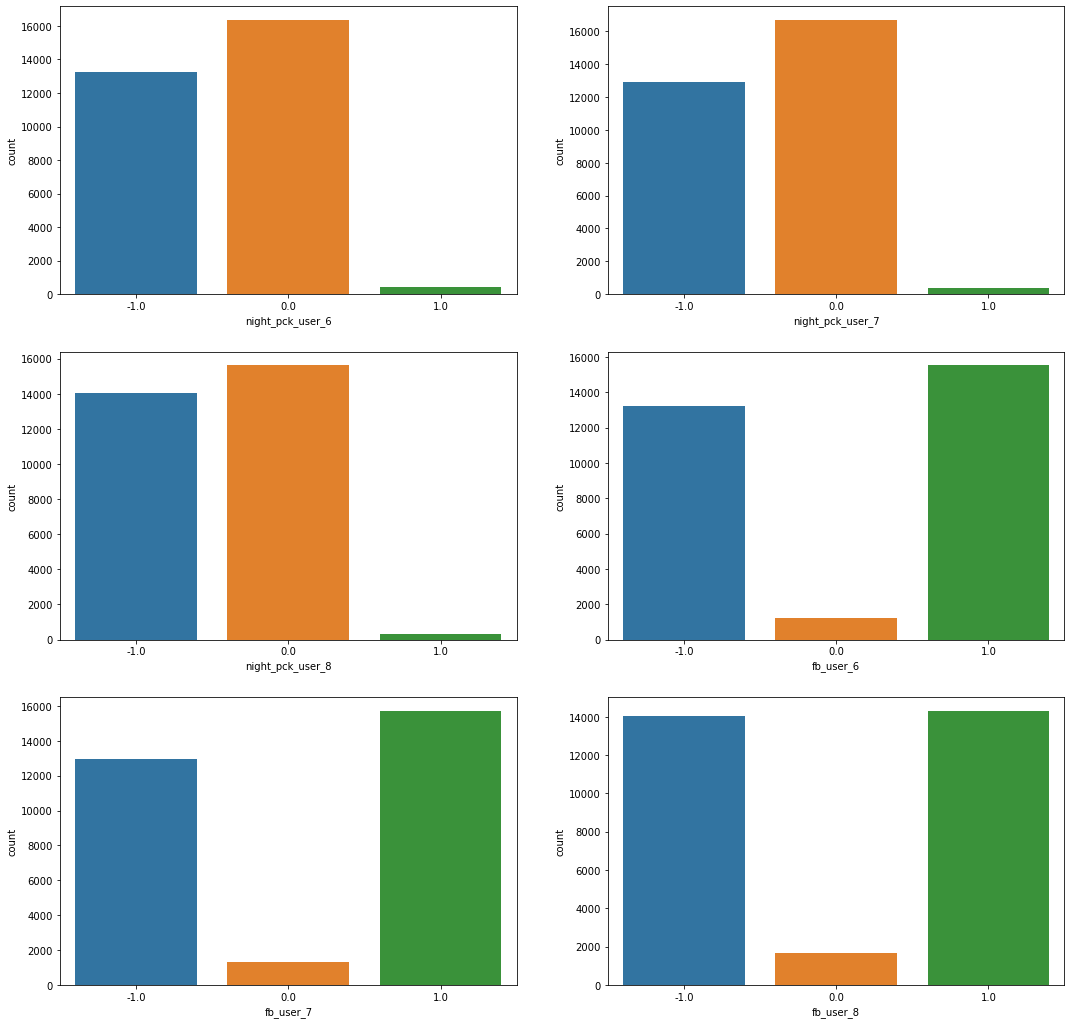

In [217]:
# For categorical variables
plt.figure(figsize=(18,18))
for i,j in enumerate(cat_col):
    plt.subplot(3,2,i+1)
    sns.countplot(visual_df[j])
plt.show()

### Visualizing Continuous Variables

In [218]:
# For Continuous Variables
# Defining function
def boxplot(column_list):
    plt.figure(figsize=(18,18))
    for i,j in enumerate(column_list):
        plt.subplot(4,5,i+1)
        sns.boxplot(visual_df[j])
    plt.show()

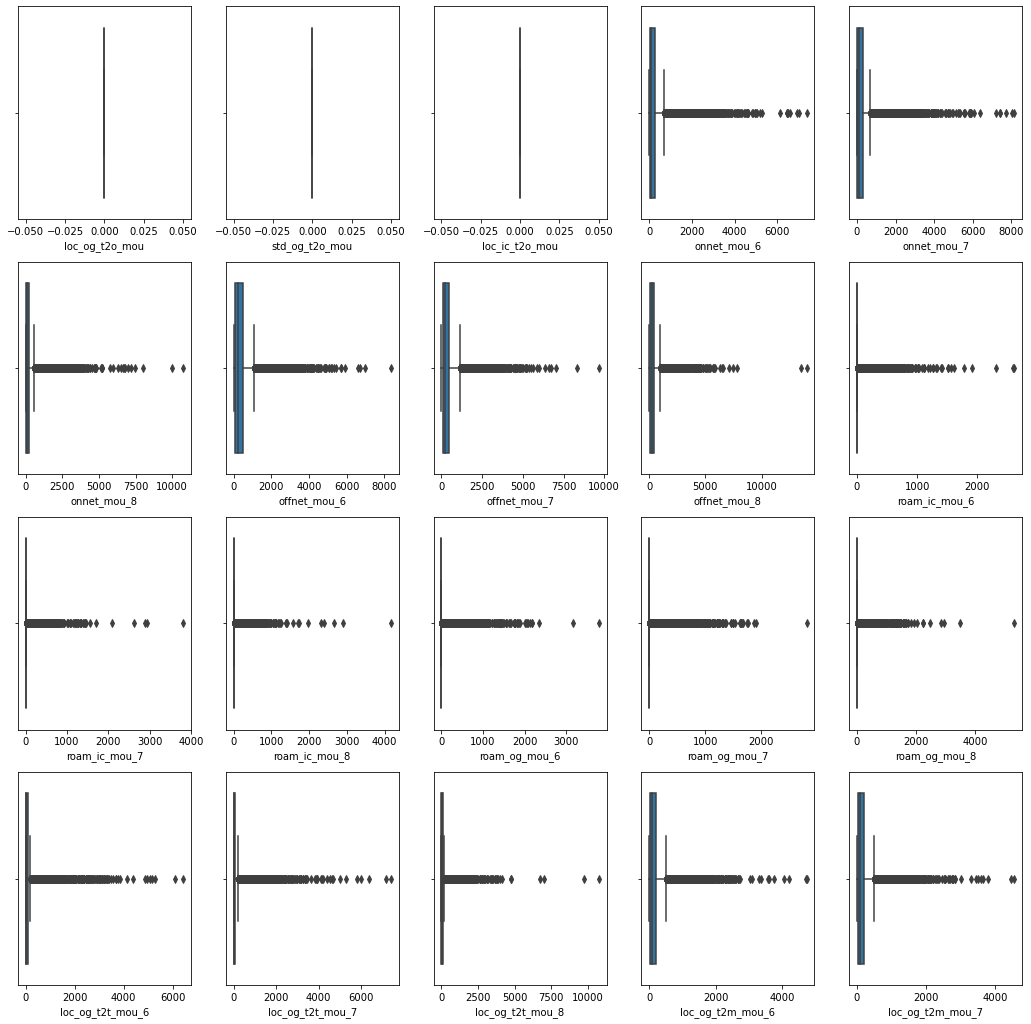

In [219]:
# Box plot
boxplot(con_col[:20])

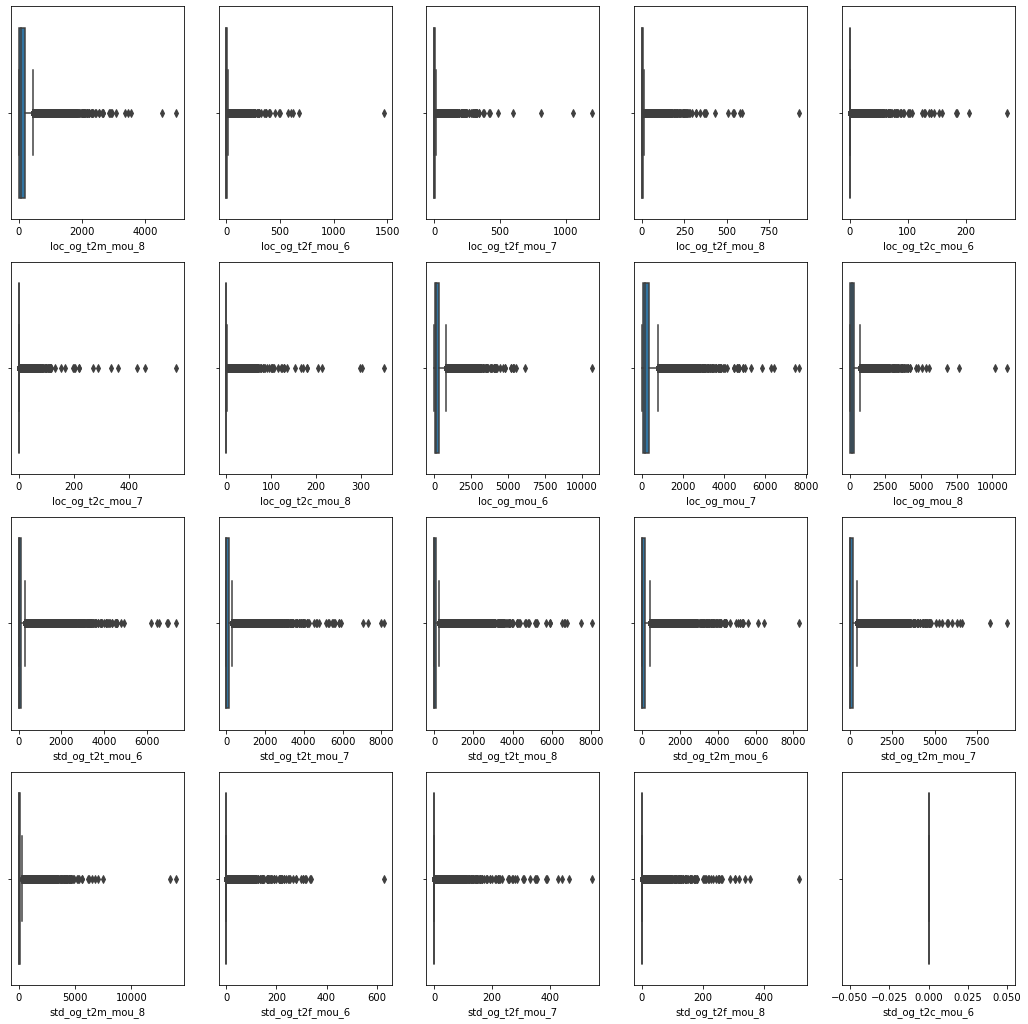

In [220]:
# Box plot
boxplot(con_col[20:40])

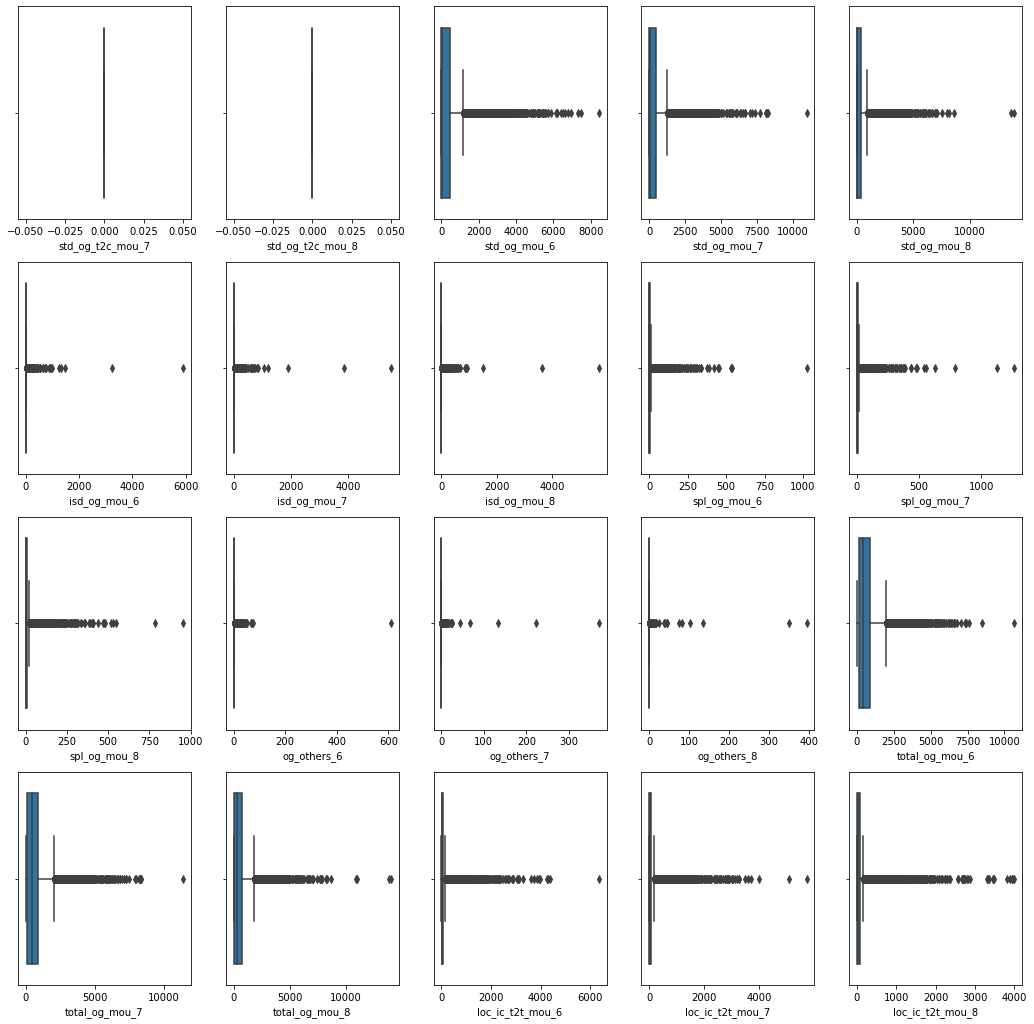

In [221]:
# Box plot
boxplot(con_col[40:60])

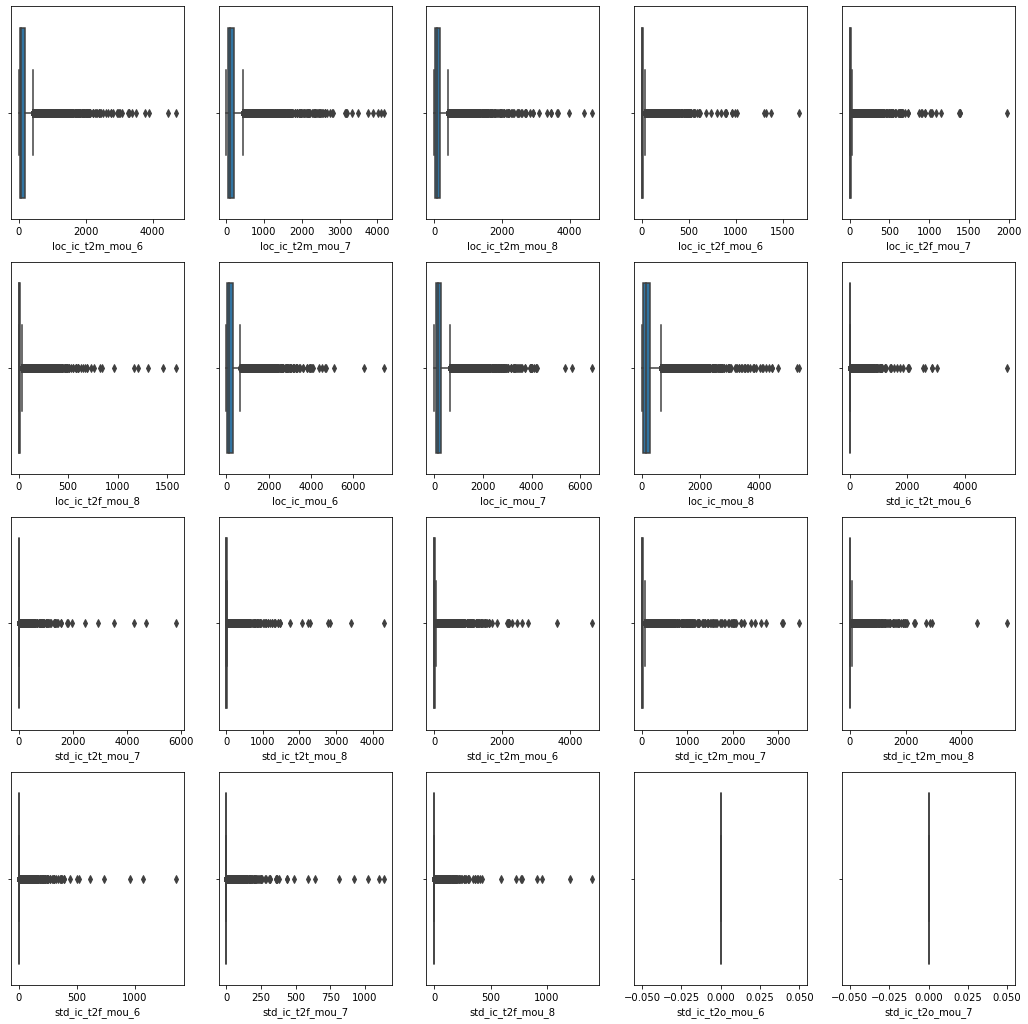

In [222]:
# Box plot
boxplot(con_col[60:80])

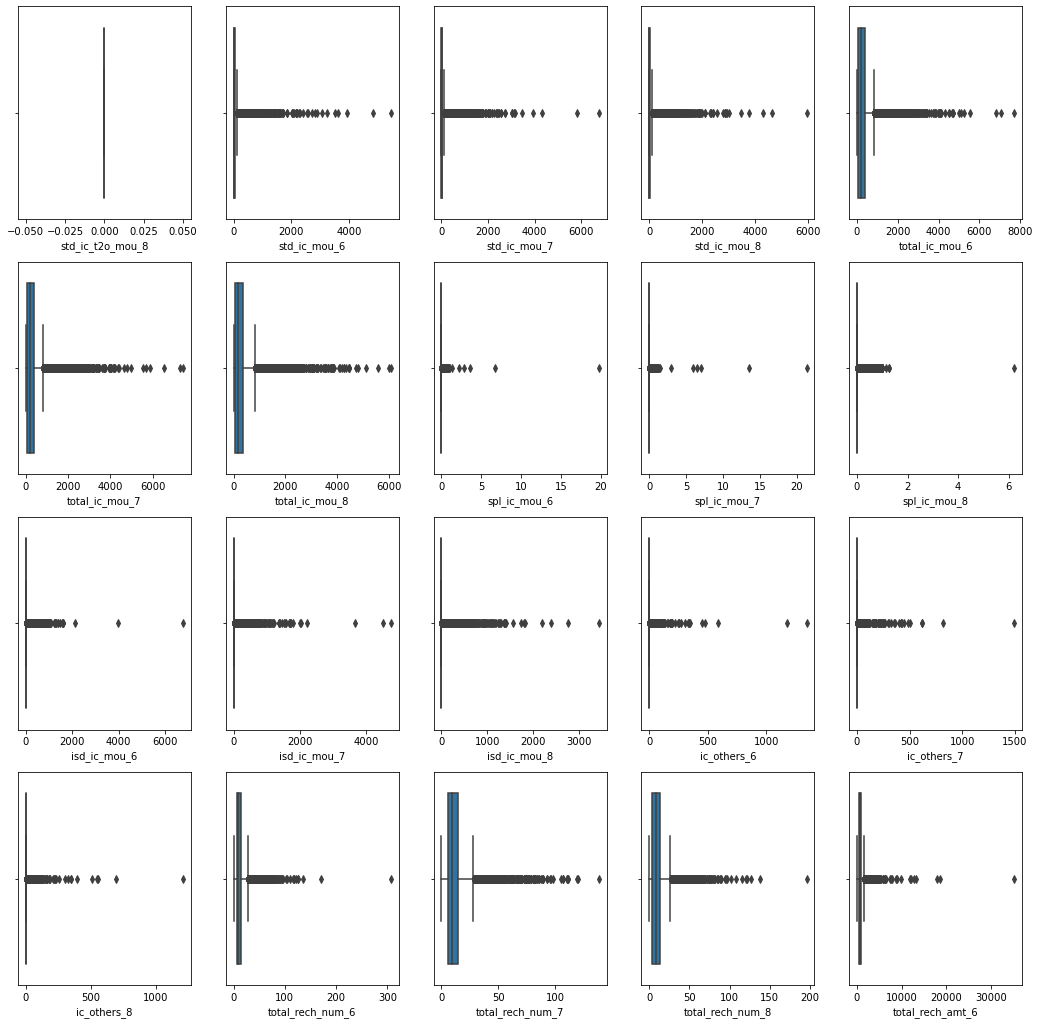

In [223]:
# Box plot
boxplot(con_col[80:100])

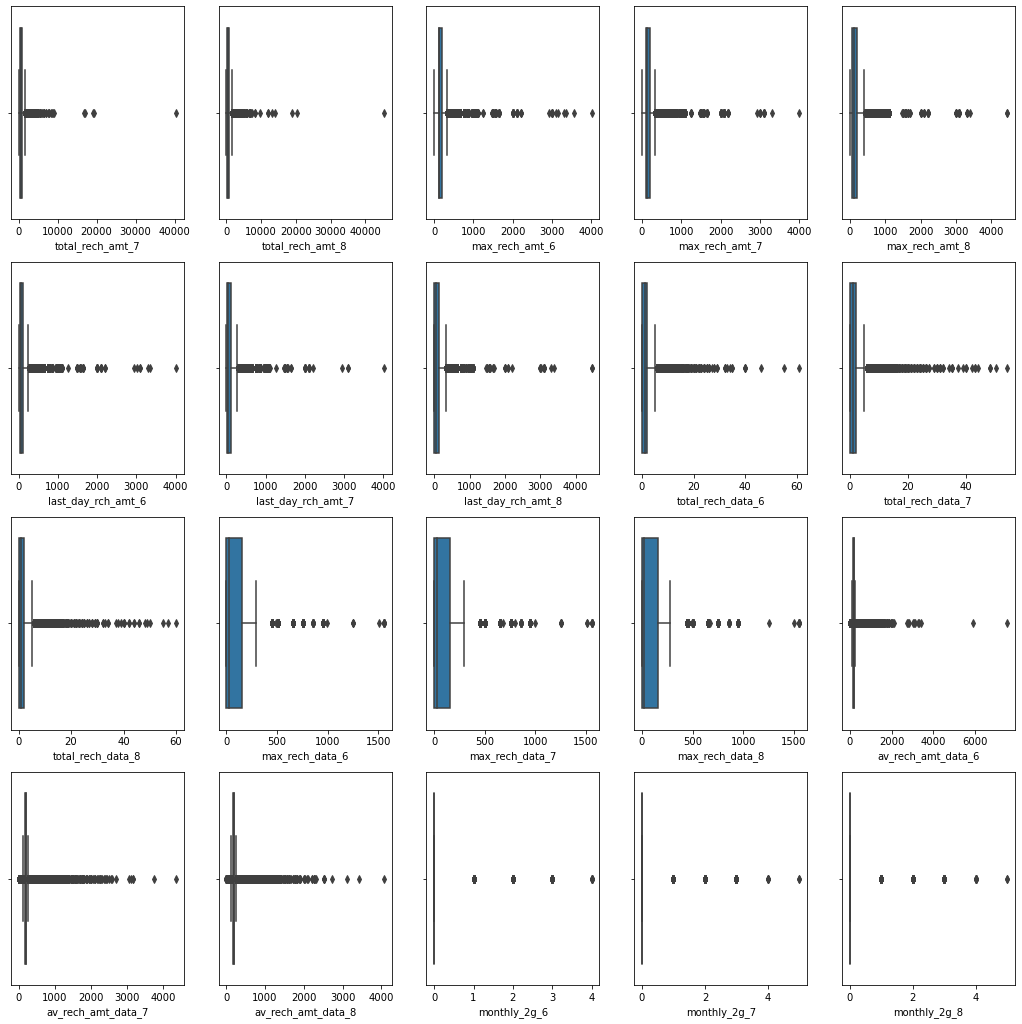

In [224]:
# Box plot
boxplot(con_col[100:120])

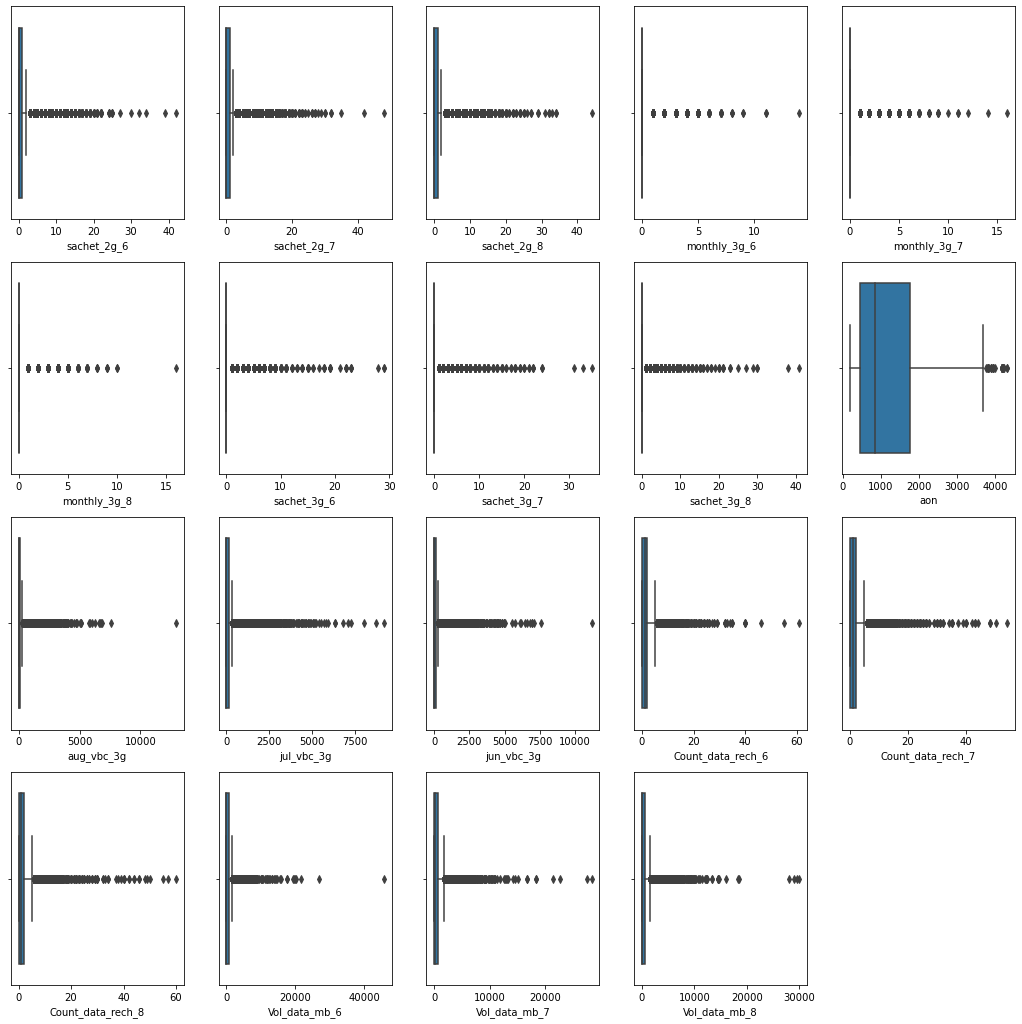

In [225]:
# Box plot
boxplot(con_col[120:])

### From above analysis
- <b>Columns don't have outlier</b>
    1. loc_og_t2o_mou
    2. std_og_t2o_mou
    3. loc_ic_t2o_mou
    4. std_og_t2o_mou_6
    5. std_og_t2o_mou_7
    6. std_og_t2o_mou_8
    7. std_ic_t2o_mou_6
    8. std_ic_t2o_mou_7
    9. std_ic_t2o_mou_8


In [226]:
# Creating distribution plot
# Defining functions
def distplot(column_list):
    plt.figure(figsize=(18,18))
    for i,j in enumerate(column_list):
        plt.subplot(4,5,i+1)
        sns.distplot(visual_df[j])
    plt.show()

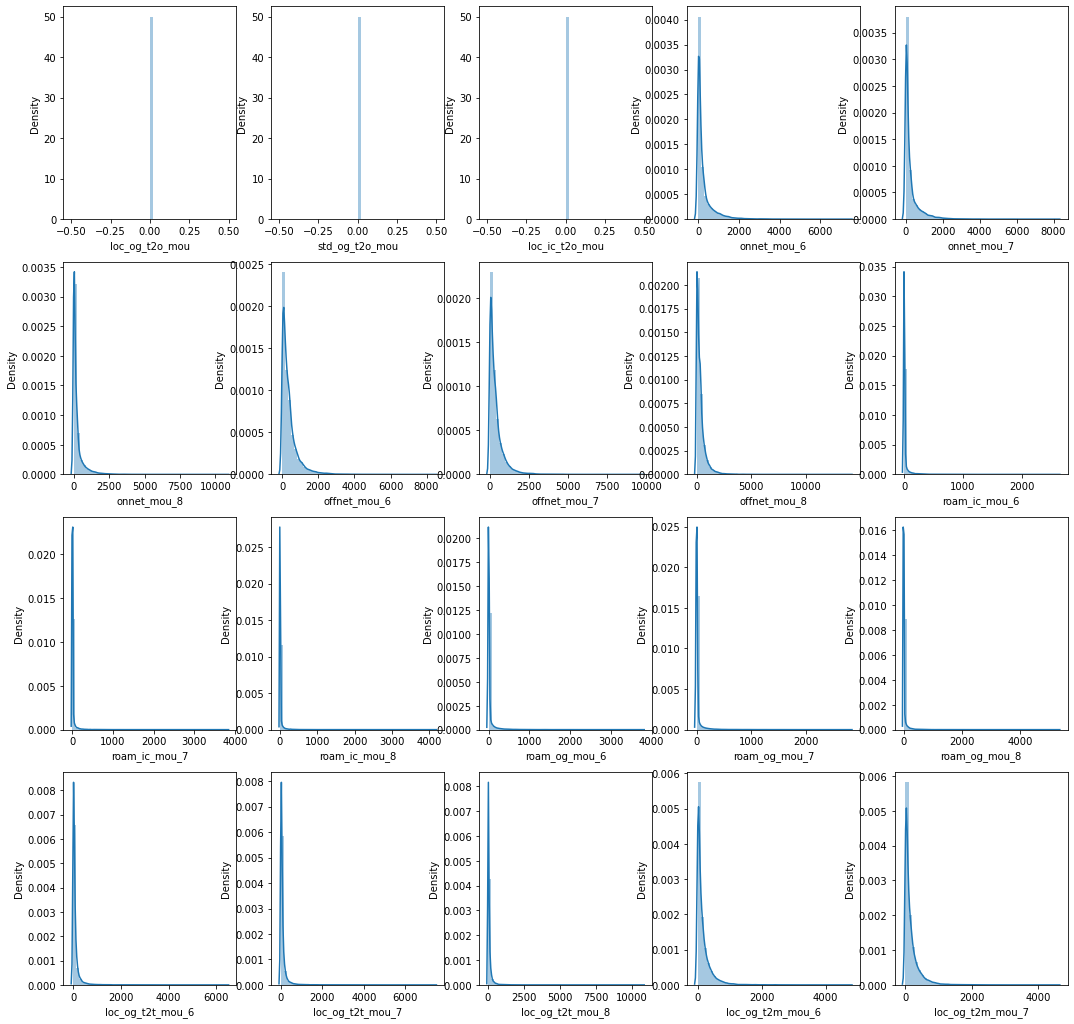

In [227]:
# Distribution plot
distplot(con_col[:20])

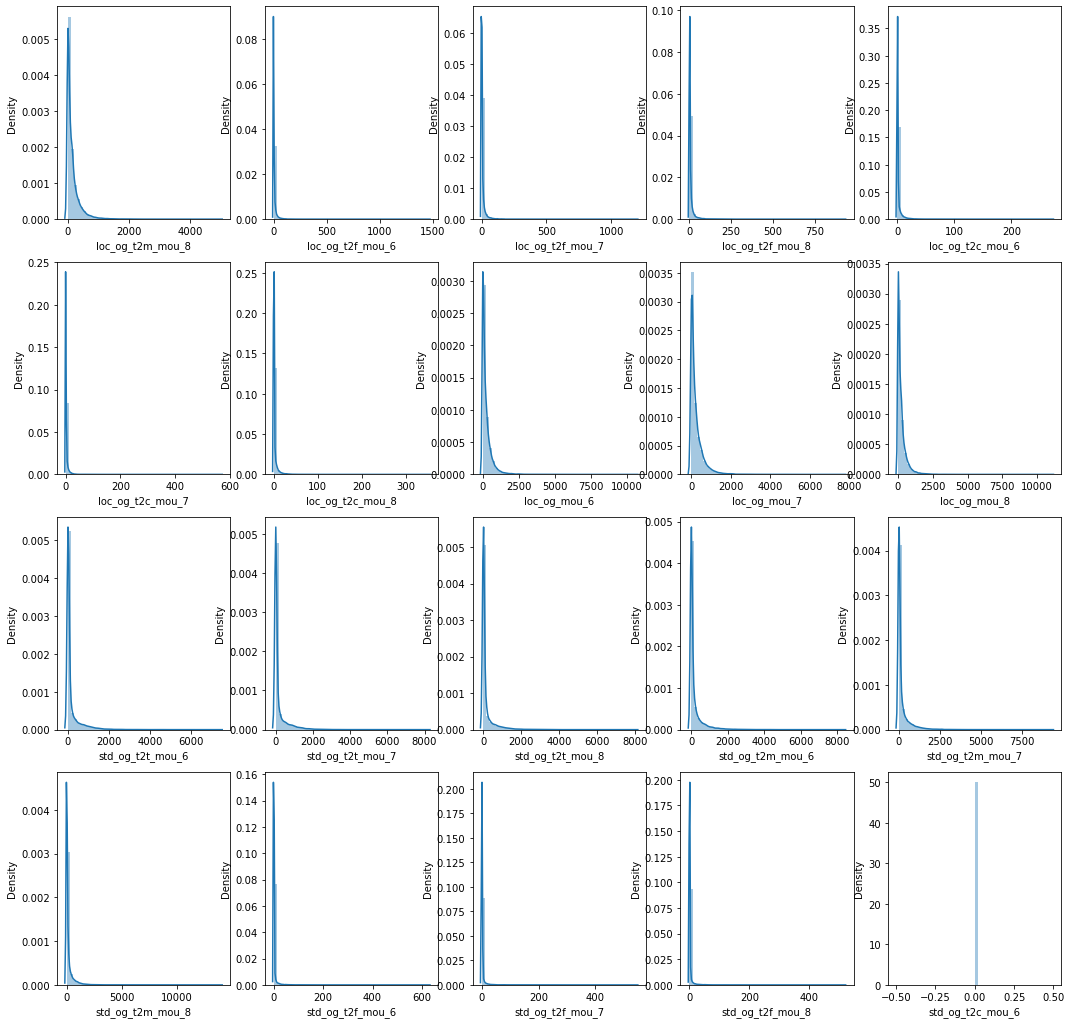

In [228]:
# Distribution plot
distplot(con_col[20:40])

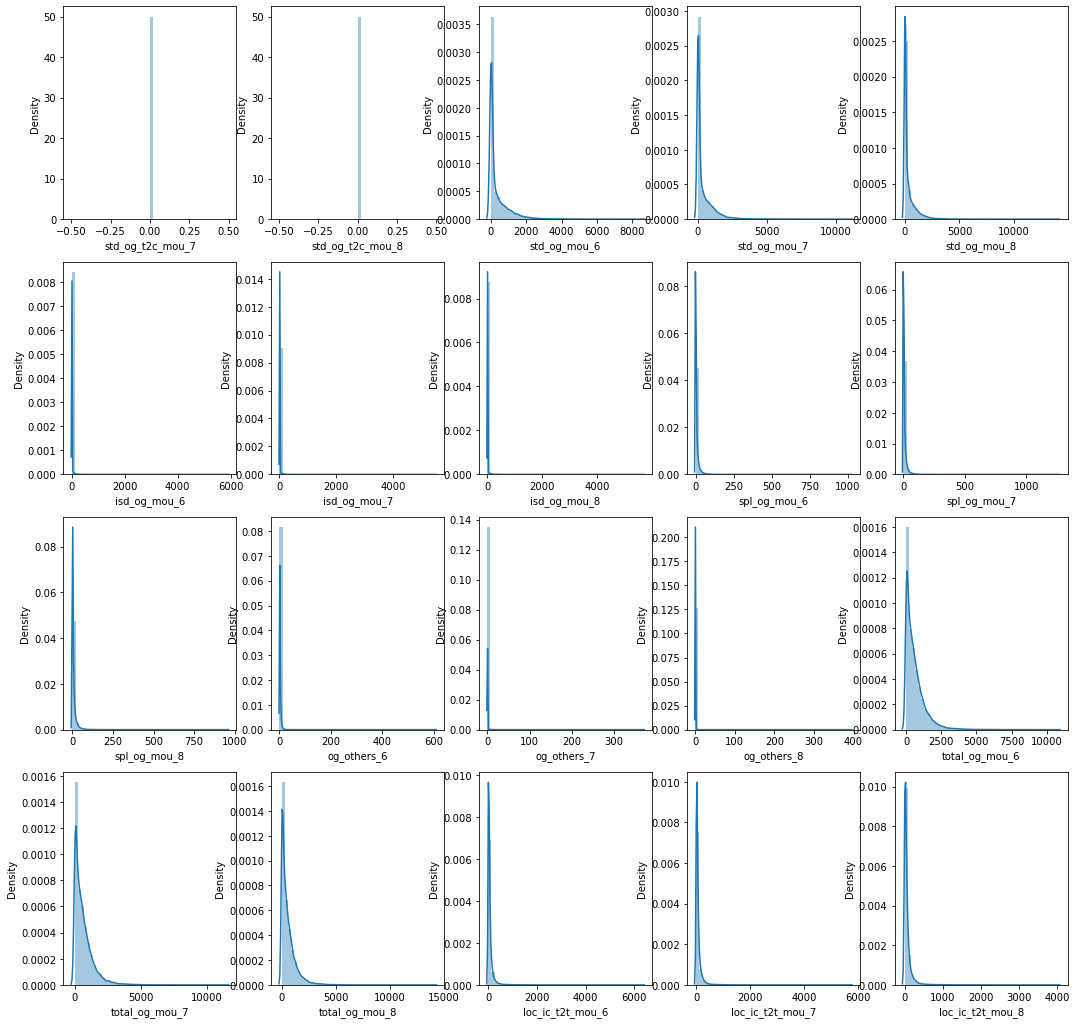

In [229]:
# Distribution plot
distplot(con_col[40:60])

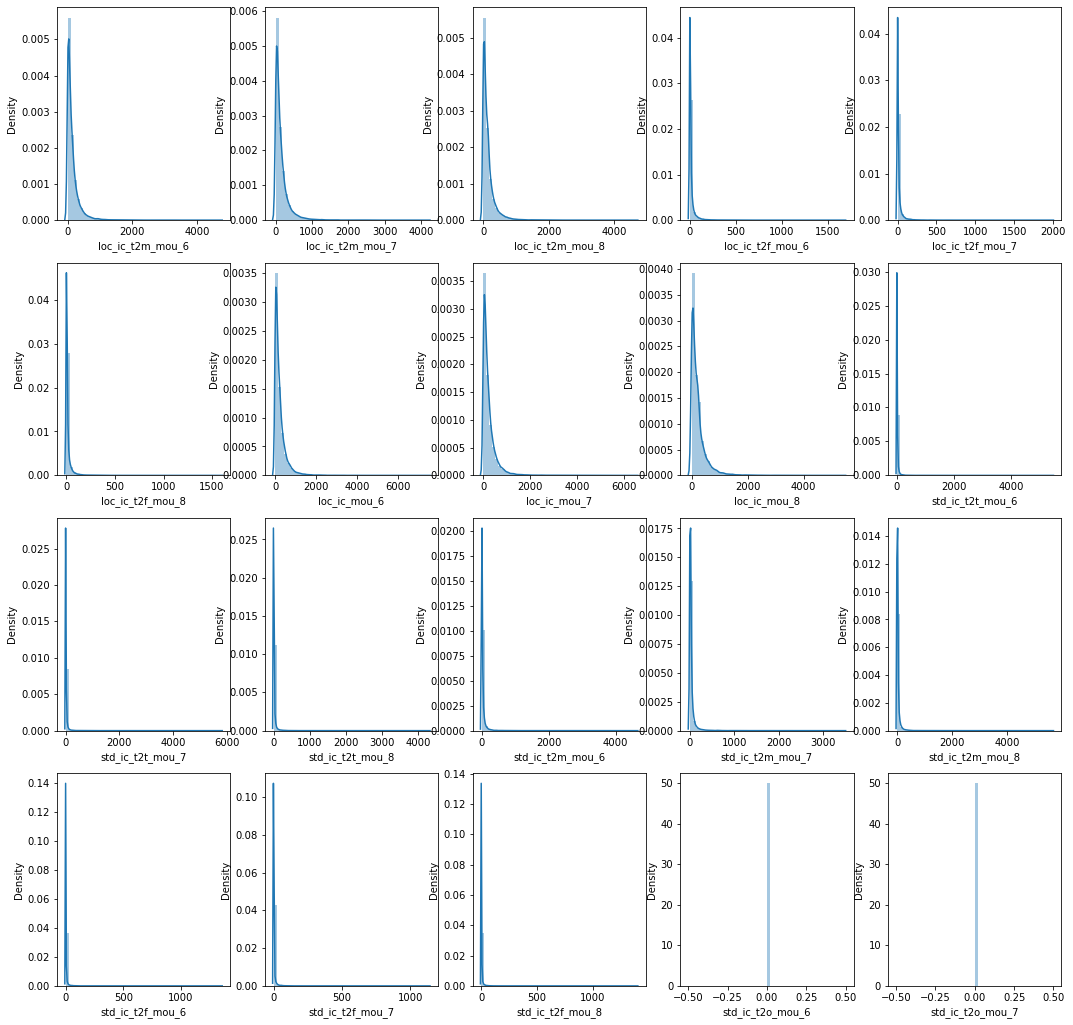

In [230]:
# Distribution plot
distplot(con_col[60:80])

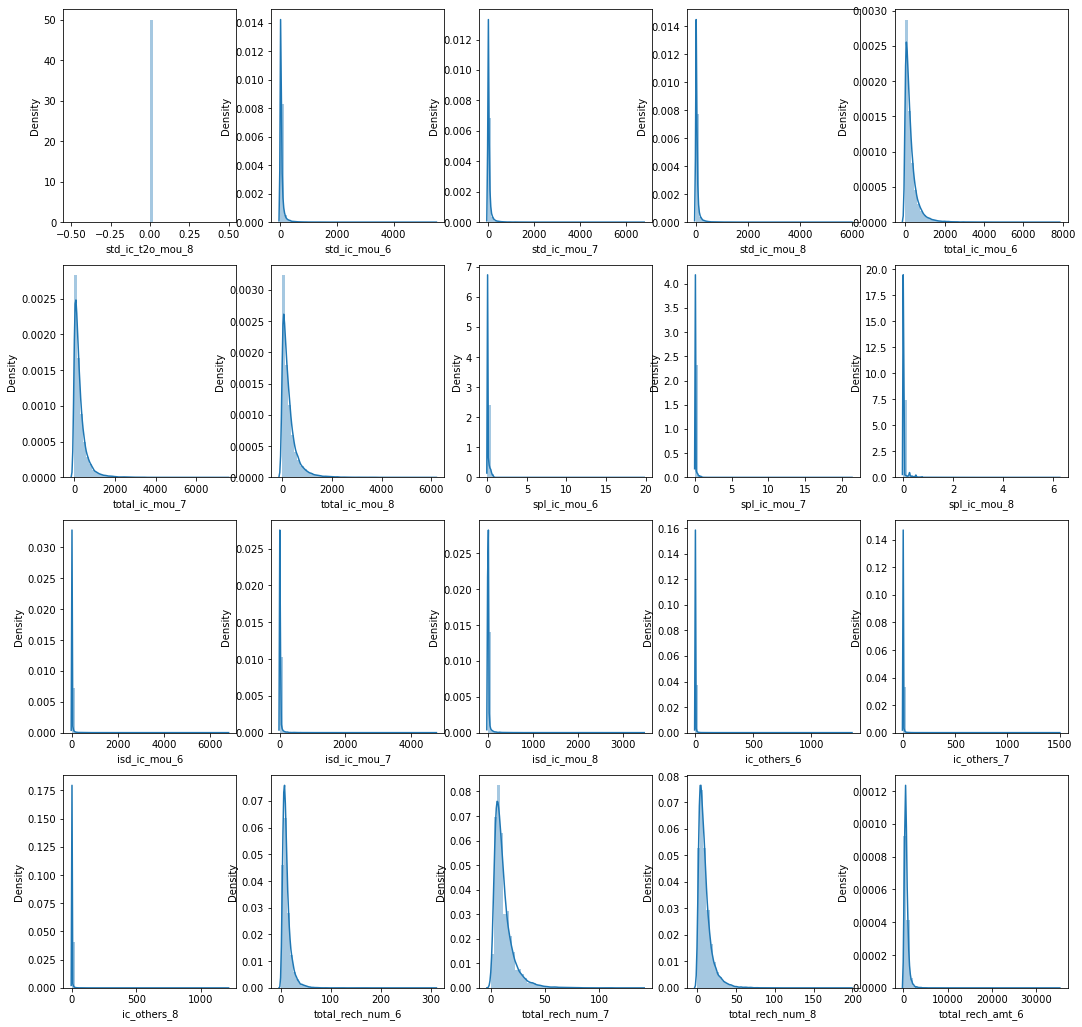

In [231]:
# Distribution plot
distplot(con_col[80: 100])

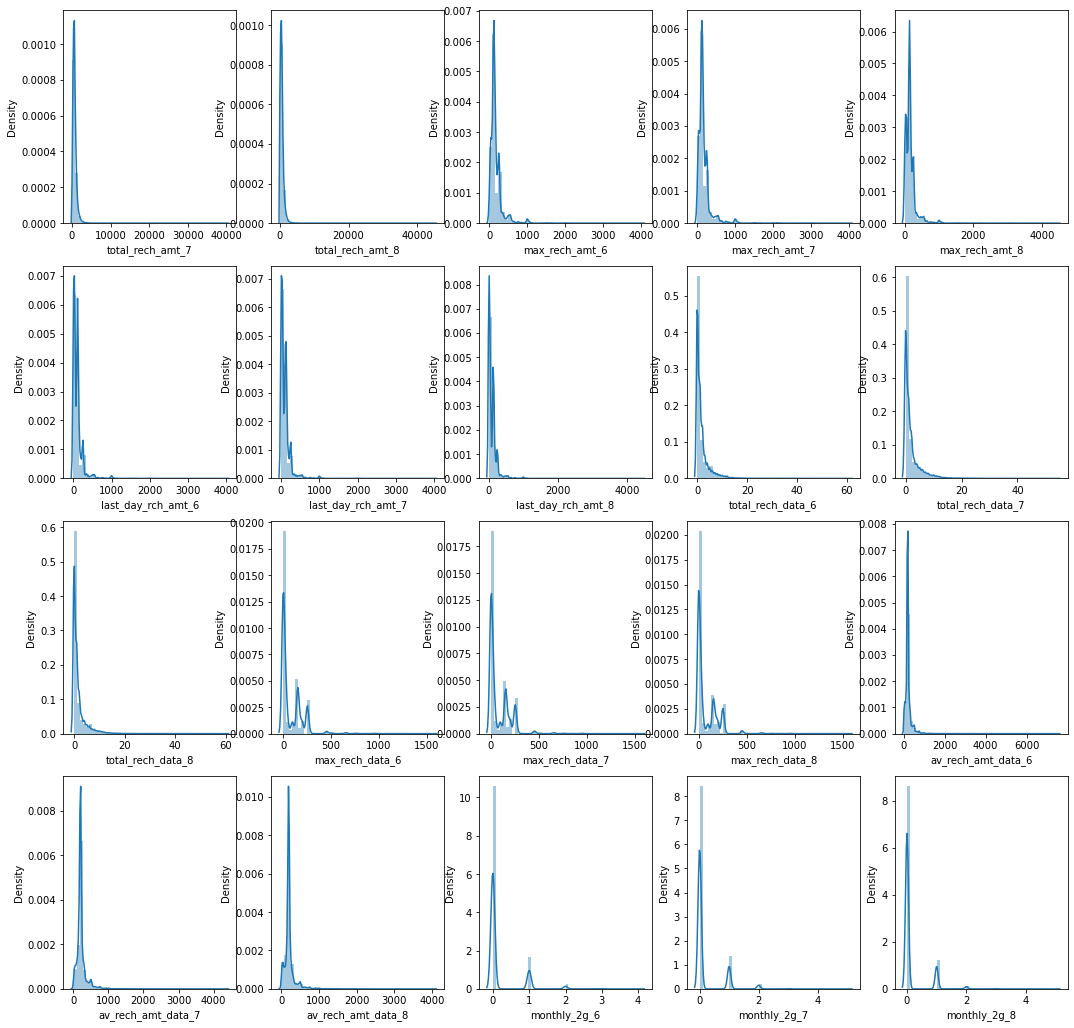

In [232]:
# Distribution plot
distplot(con_col[100:120])

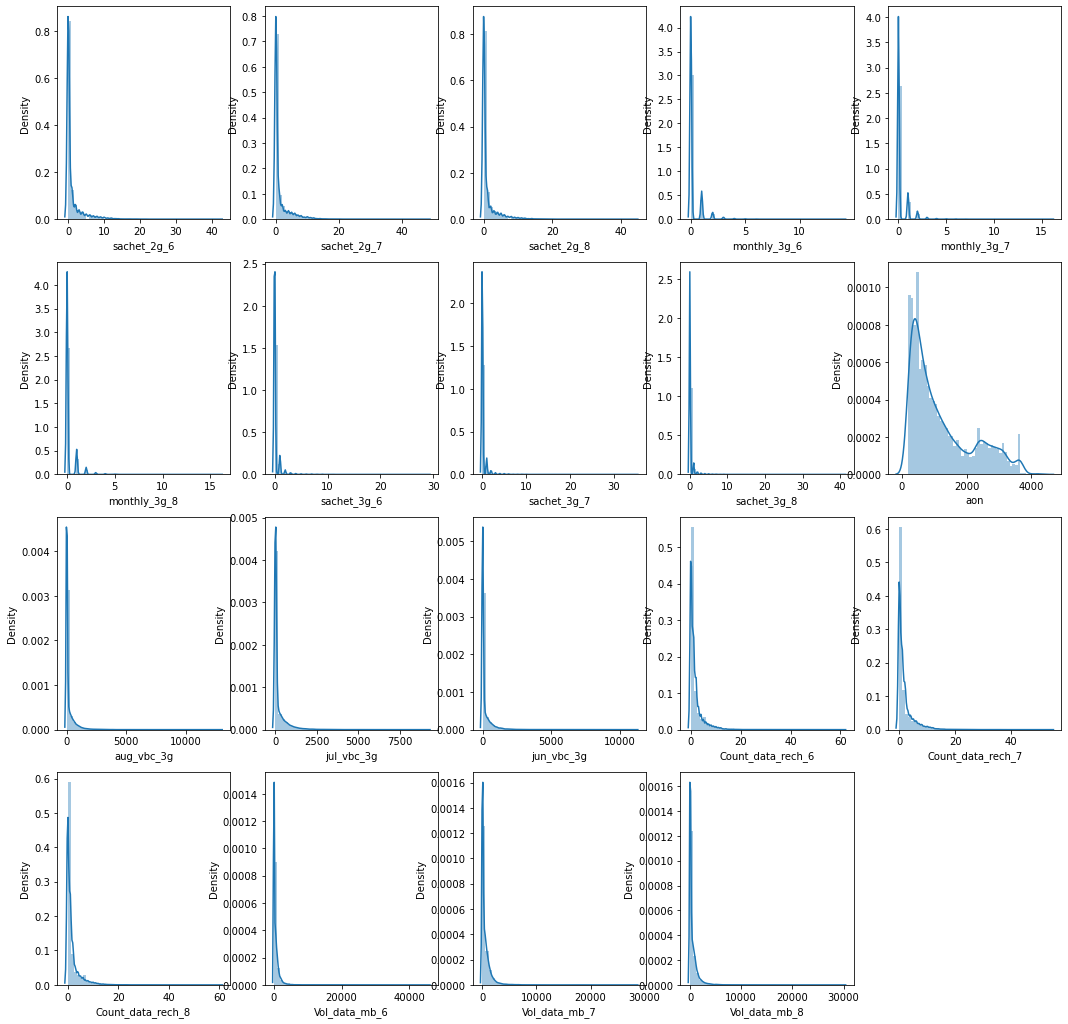

In [233]:
# Distribution plot
distplot(con_col[120:])

### From above analysis
- All variable are positive skew

#### Step-4.2
##### Bivariate Analysis

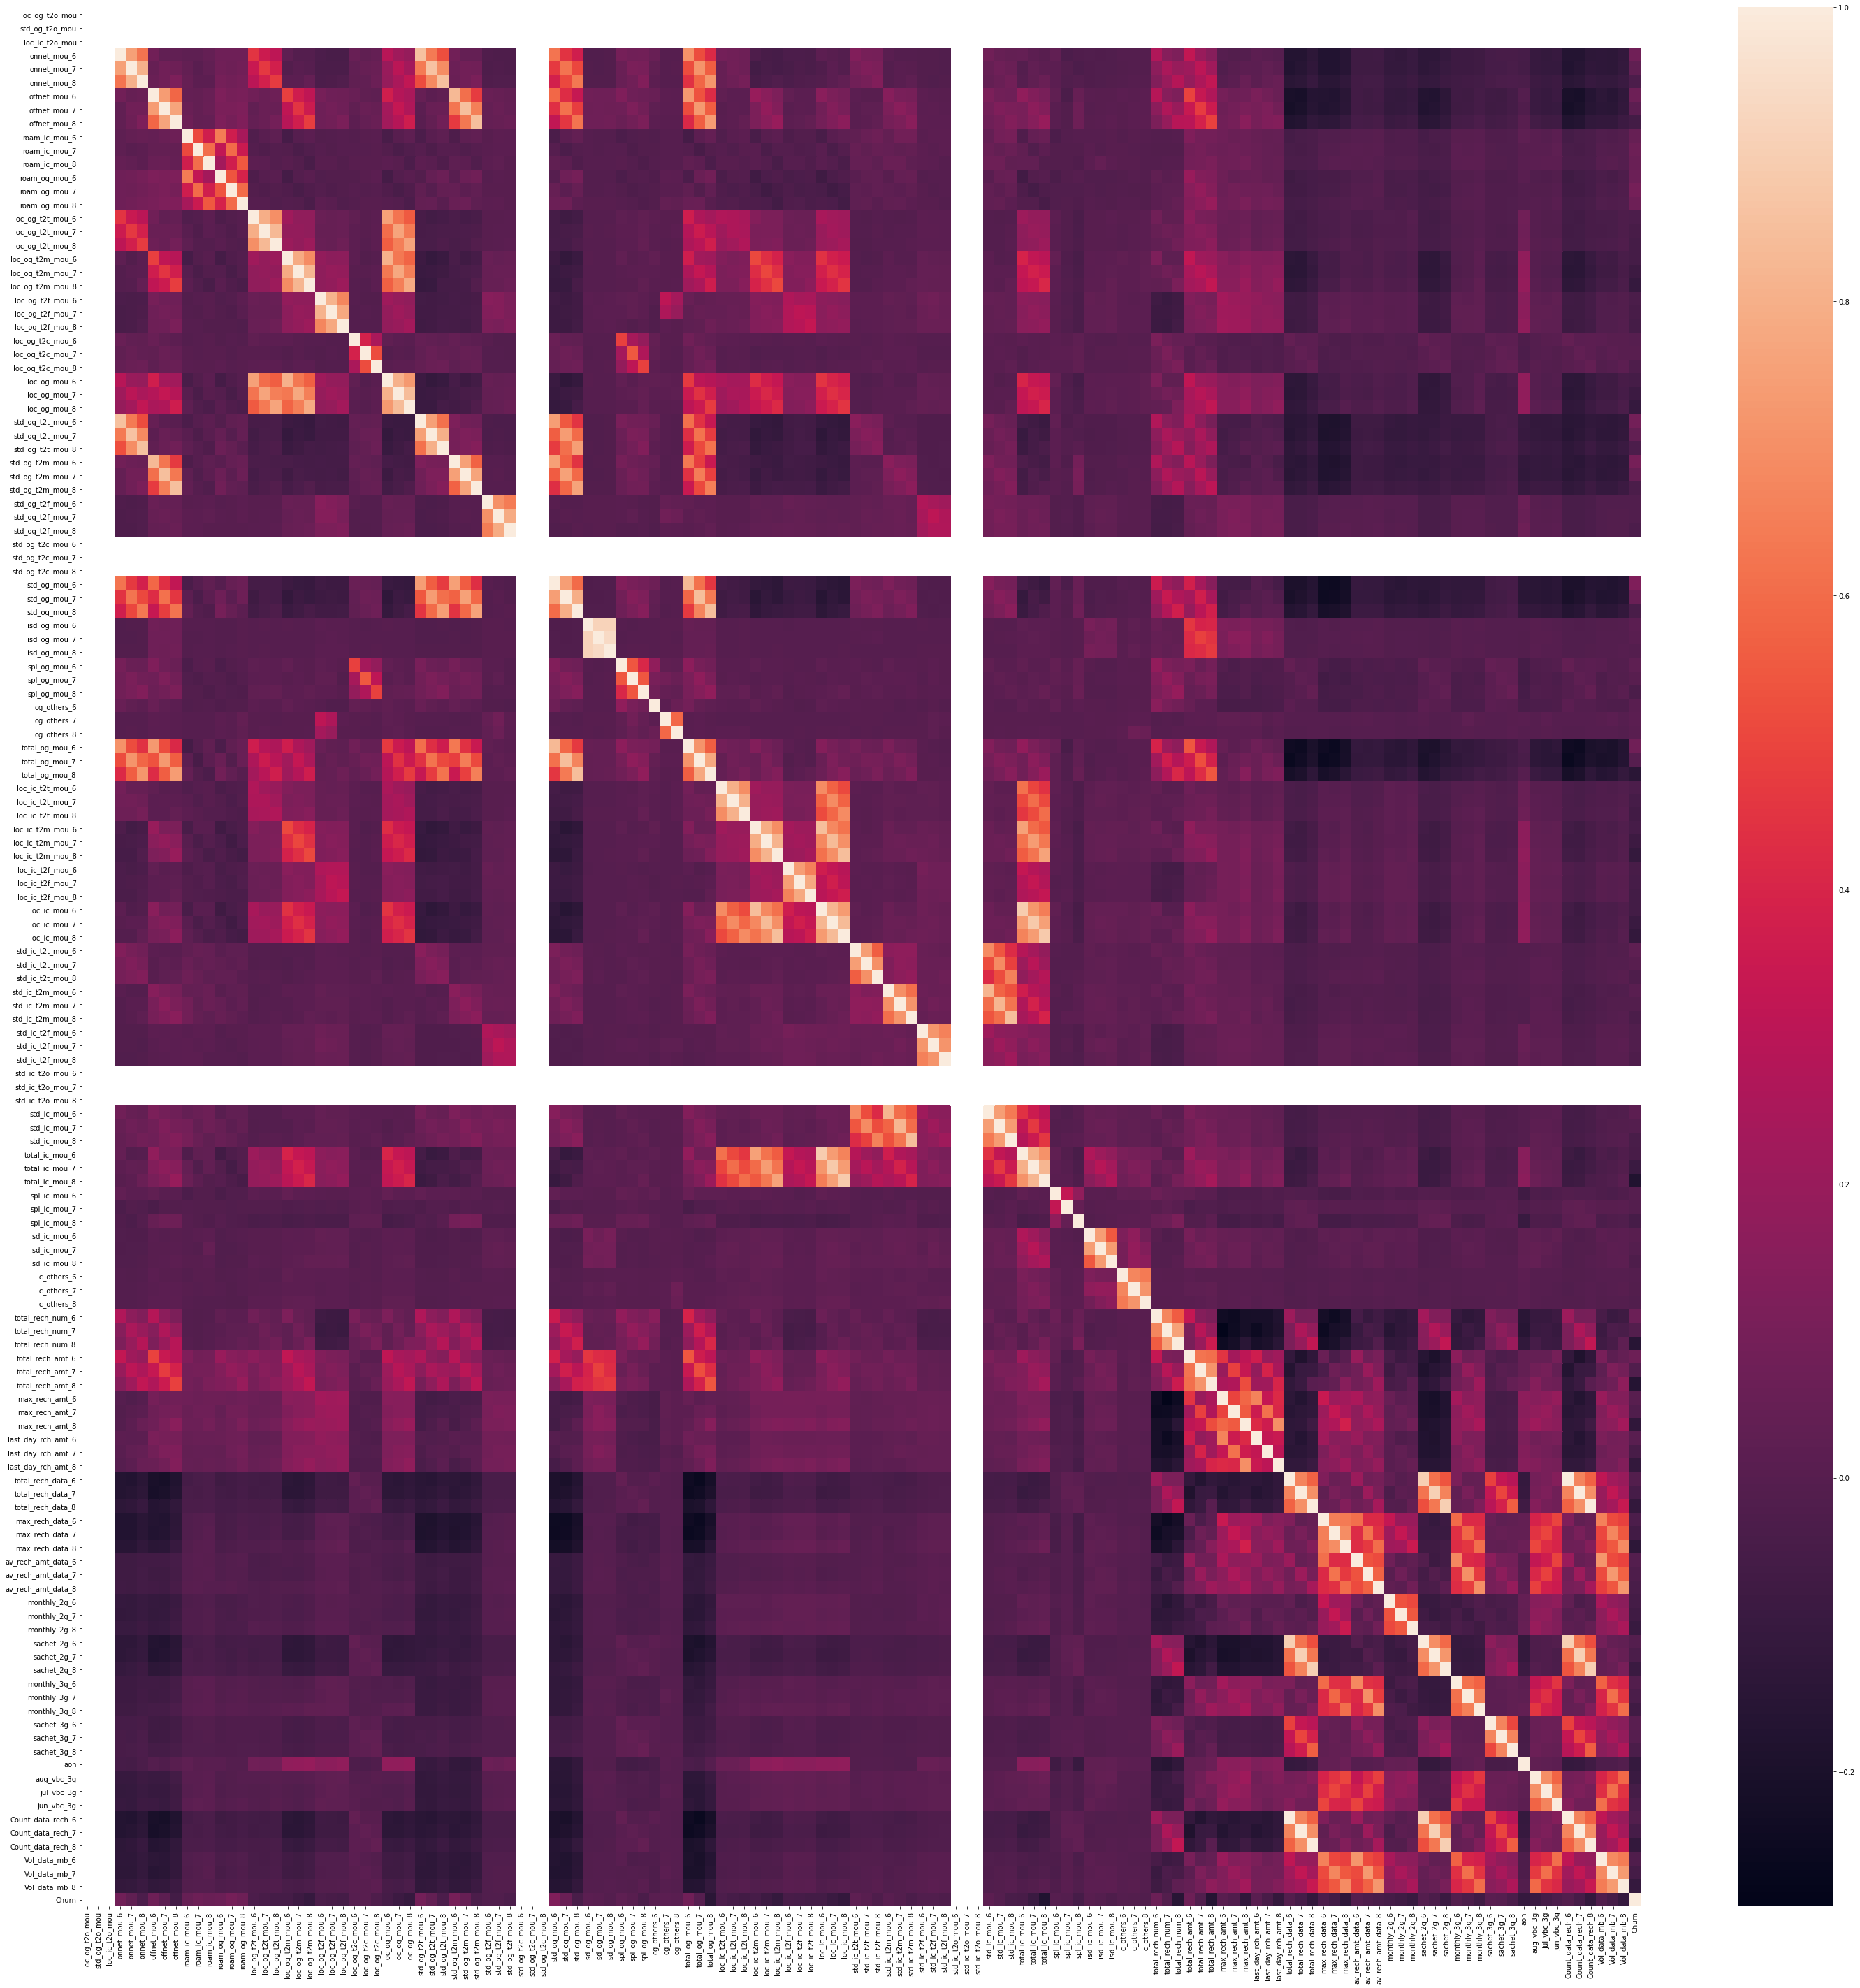

In [234]:
# Correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(visual_df.corr())
plt.show()

In [235]:
# Defining function
def cat_comp(column_list):
    for j,i in enumerate(column_list):
        # Creating pivot table
        table = pd.pivot_table(data=telecom_churn_filter, values='mobile_number', index=i, columns= 'Churn', aggfunc='count')
        # plot
        plt_1 = table[[0,1]].apply(lambda x: round(x/x.sum(),2), axis=1)
        # figure
        fig_1 = px.bar(plt_1, title=str(i)+" vs Churn")
        fig_1.show()

In [236]:
cat_comp(cat_col)

#### Analysis
Customer which has no data present or is not using `"FB User"` or `"Night Pack User"` are likely to get churn

## Step-5 : Dealing with Outliers

In [237]:
# Using IQR to deal with outliers
# Defining function
def outlier(df, column):
    for i in column:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3- Q1
        df = df[(df[i]>=Q1-(1.5*IQR)) & (df[i]<= Q3+(1.5*IQR))]
    return df

In [238]:
# Applying to dataframe
# Copy_dataframe
telecom_churn_df = telecom_churn_filter.iloc[:,2:].copy()
telecom_churn_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0       265.62       272.70   
1             0.0             0.0             0.0        57.84        54.68   
2             0.0             0.0             0.0       413.69       351.03   
3             0.0             0.0             0.0       102.41       132.11   
4             0.0             0.0             0.0        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00        380.61        384.99          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00        

In [239]:
# Appling outlier functions to continuous variables
outlier(telecom_churn_df, con_col)

# Chedking shape
telecom_churn_df.shape

(30001, 146)

## Step-6 : Preparing Dataset for Modeling

#### Step-6.1 Feature Engineering (Converting difference column avg month of 6 and 7 to month 8)

In [240]:
# Coping dataset
df = telecom_churn_df.copy()

In [241]:
# Creating list
month_6 = []
month_7 = []
month_8 = []

# Loop
for each_col in df.columns:
    if "_6" in each_col:
        month_6.append(each_col)
    elif "_7" in each_col:
        month_7.append(each_col)
    elif "_8" in each_col:
        month_8.append(each_col)

print(len(month_6))
print(len(month_7))
print(len(month_8))

46
46
46


In [242]:
# Removing categorical column from list of month_6, month_7 and month_8
for col in month_6:
    if "night_pck_user" in col:
        month_6.remove(col)
    elif  "fb_user" in col:
        month_6.remove(col)
        
for col in month_7:
    if "night_pck_user" in col:
        month_7.remove(col)
    elif  "fb_user" in col:
        month_7.remove(col)
        
for col in month_8:
    if "night_pck_user" in col:
        month_8.remove(col)
    elif  "fb_user" in col:
        month_8.remove(col)
        
print(len(month_6))
print(len(month_7))
print(len(month_8))

44
44
44


In [243]:
# Creating column
for col_6 in month_6:
    var = col_6.split("_6")[0]
    df["Differ_"+var] = df[var+"_8"] - ((df[var+"_6"] + df[var+"_7"])/2)

df["Differ_vbc_3g"] = df["aug_vbc_3g"] - ((df["jun_vbc_3g"] + df["jul_vbc_3g"])/2)
# Checking shape
df.shape

(30001, 191)

In [244]:
# Dropping column
df.drop(columns=month_6, inplace=True)
df.drop(columns=month_7, inplace=True)

df.drop(columns=[ "jun_vbc_3g", "jul_vbc_3g"], inplace=True)

# Checking shape
df.shape

(30001, 101)

In [245]:
# Checking head
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_8  offnet_mou_8  \
0             0.0             0.0             0.0         0.00          0.00   
1             0.0             0.0             0.0        52.29        325.91   
2             0.0             0.0             0.0        35.08        136.48   
3             0.0             0.0             0.0        85.14        983.39   
4             0.0             0.0             0.0        33.58        205.89   

   roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0           0.00           0.00              0.00              0.00   
1          31.64          38.06             40.28            162.28   
2           0.00           0.00             12.49             50.54   
3           0.00           0.00             23.34            104.81   
4           0.00           0.00             33.58            148.56   

   loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0              0.00              0.00          0.00              0.00   
1             53.23              0.00        255.79             12.01   
2              0.00              7.15         63.04             22.58   
3              1.58              0.00        129.74             61.79   
4              0.00             17.71        182.14              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  \
0              0.00              0.00               0.0          0.00   
1             49.14             16.68               0.0         77.84   
2             75.69              0.00               0.0         98.28   
3            876.99              0.00               0.0        938.79   
4             39.61              0.00               0.0         39.61   

   isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          0.00          0.00          0.0            0.00              0.16   
1         10.01          6.50          0.0          350.16             27.31   
2          0.00         10.23          0.0          171.56              0.31   
3          0.00          0.00          0.0         1068.54             19.54   
4          0.00         17.71          0.0          239.48             76.64   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0              4.13              1.15          5.44              0.00   
1            121.19             39.53        188.04             30.39   
2             15.48              0.00         15.79              0.10   
3            129.16             10.39        159.11              0.18   
4            146.84              0.71        224.21             13.38   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
0              0.00              0.00               0.0          0.00   
1            141.33             22.21               0.0        193.94   
2              0.65              0.00               0.0          0.75   
3            101.74              0.00               0.0        101.93   
4             43.91              0.00               0.0         57.29   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            5.44           0.0          0.00         0.00                 2   
1          428.74           0.0         31.59        15.14                 7   
2           16.54           0.0          0.00         0.00                14   
3          261.04           0.0          0.00         0.00                27   
4          298.33           0.0          3.74        13.06                 4   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0               252             252                 252                1.0   
1              3638            1580                 779                0.0   
2               120              30                  10                3.0   
3               718              50                  50          

#### Step-6.2 Converting categorical value into dummy

In [246]:
# Categorical column are
cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [247]:
# Creating dummy variables
df[cat_col] = df[cat_col].astype('category')
df = pd.get_dummies(df)
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_8  offnet_mou_8  \
0             0.0             0.0             0.0         0.00          0.00   
1             0.0             0.0             0.0        52.29        325.91   
2             0.0             0.0             0.0        35.08        136.48   
3             0.0             0.0             0.0        85.14        983.39   
4             0.0             0.0             0.0        33.58        205.89   

   roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0           0.00           0.00              0.00              0.00   
1          31.64          38.06             40.28            162.28   
2           0.00           0.00             12.49             50.54   
3           0.00           0.00             23.34            104.81   
4           0.00           0.00             33.58            148.56   

   loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0              0.00              0.00          0.00              0.00   
1             53.23              0.00        255.79             12.01   
2              0.00              7.15         63.04             22.58   
3              1.58              0.00        129.74             61.79   
4              0.00             17.71        182.14              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  \
0              0.00              0.00               0.0          0.00   
1             49.14             16.68               0.0         77.84   
2             75.69              0.00               0.0         98.28   
3            876.99              0.00               0.0        938.79   
4             39.61              0.00               0.0         39.61   

   isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          0.00          0.00          0.0            0.00              0.16   
1         10.01          6.50          0.0          350.16             27.31   
2          0.00         10.23          0.0          171.56              0.31   
3          0.00          0.00          0.0         1068.54             19.54   
4          0.00         17.71          0.0          239.48             76.64   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0              4.13              1.15          5.44              0.00   
1            121.19             39.53        188.04             30.39   
2             15.48              0.00         15.79              0.10   
3            129.16             10.39        159.11              0.18   
4            146.84              0.71        224.21             13.38   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
0              0.00              0.00               0.0          0.00   
1            141.33             22.21               0.0        193.94   
2              0.65              0.00               0.0          0.75   
3            101.74              0.00               0.0        101.93   
4             43.91              0.00               0.0         57.29   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            5.44           0.0          0.00         0.00                 2   
1          428.74           0.0         31.59        15.14                 7   
2           16.54           0.0          0.00         0.00                14   
3          261.04           0.0          0.00         0.00                27   
4          298.33           0.0          3.74        13.06                 4   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0               252             252                 252                1.0   
1              3638            1580                 779                0.0   
2               120              30                  10                3.0   
3               718              50                  50          

In [248]:
# Renaming column
col_na = []
col_no = []
col_yes = []
for i in df.columns:
    if "_-1.0" in i:
        col_na.append(i)
    elif "_0.0" in i:
        col_no.append(i)
    elif "_1.0" in i:
        col_yes.append(i)

# Adding suffix
for i in col_na:
    new_col = i.split("_-1.0")[0] + "_NA"
    df.rename(columns={i:new_col}, inplace=True)

for i in col_no:
    new_col = i.split("_-0.0")[0] + "_NO"
    df.rename(columns={i:new_col}, inplace=True)
    
for i in col_yes:
    new_col = i.split("_-1.0")[0] + "_YES"
    df.rename(columns={i:new_col}, inplace=True)

In [249]:
# Checking head
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_8  offnet_mou_8  \
0             0.0             0.0             0.0         0.00          0.00   
1             0.0             0.0             0.0        52.29        325.91   
2             0.0             0.0             0.0        35.08        136.48   
3             0.0             0.0             0.0        85.14        983.39   
4             0.0             0.0             0.0        33.58        205.89   

   roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0           0.00           0.00              0.00              0.00   
1          31.64          38.06             40.28            162.28   
2           0.00           0.00             12.49             50.54   
3           0.00           0.00             23.34            104.81   
4           0.00           0.00             33.58            148.56   

   loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0              0.00              0.00          0.00              0.00   
1             53.23              0.00        255.79             12.01   
2              0.00              7.15         63.04             22.58   
3              1.58              0.00        129.74             61.79   
4              0.00             17.71        182.14              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  \
0              0.00              0.00               0.0          0.00   
1             49.14             16.68               0.0         77.84   
2             75.69              0.00               0.0         98.28   
3            876.99              0.00               0.0        938.79   
4             39.61              0.00               0.0         39.61   

   isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          0.00          0.00          0.0            0.00              0.16   
1         10.01          6.50          0.0          350.16             27.31   
2          0.00         10.23          0.0          171.56              0.31   
3          0.00          0.00          0.0         1068.54             19.54   
4          0.00         17.71          0.0          239.48             76.64   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0              4.13              1.15          5.44              0.00   
1            121.19             39.53        188.04             30.39   
2             15.48              0.00         15.79              0.10   
3            129.16             10.39        159.11              0.18   
4            146.84              0.71        224.21             13.38   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
0              0.00              0.00               0.0          0.00   
1            141.33             22.21               0.0        193.94   
2              0.65              0.00               0.0          0.75   
3            101.74              0.00               0.0        101.93   
4             43.91              0.00               0.0         57.29   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            5.44           0.0          0.00         0.00                 2   
1          428.74           0.0         31.59        15.14                 7   
2           16.54           0.0          0.00         0.00                14   
3          261.04           0.0          0.00         0.00                27   
4          298.33           0.0          3.74        13.06                 4   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0               252             252                 252                1.0   
1              3638            1580                 779                0.0   
2               120              30                  10                3.0   
3               718              50                  50          

In [250]:
# Dropping column which contain"_NO"
for i in df.columns:
    if "_NO" in i:
        df.drop(columns=i, inplace=True)
# Checking shape
print(df.shape)
# Checking head
df.head()

(30001, 107)


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_8  offnet_mou_8  \
0             0.0             0.0             0.0         0.00          0.00   
1             0.0             0.0             0.0        52.29        325.91   
2             0.0             0.0             0.0        35.08        136.48   
3             0.0             0.0             0.0        85.14        983.39   
4             0.0             0.0             0.0        33.58        205.89   

   roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0           0.00           0.00              0.00              0.00   
1          31.64          38.06             40.28            162.28   
2           0.00           0.00             12.49             50.54   
3           0.00           0.00             23.34            104.81   
4           0.00           0.00             33.58            148.56   

   loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0              0.00              0.00          0.00              0.00   
1             53.23              0.00        255.79             12.01   
2              0.00              7.15         63.04             22.58   
3              1.58              0.00        129.74             61.79   
4              0.00             17.71        182.14              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  \
0              0.00              0.00               0.0          0.00   
1             49.14             16.68               0.0         77.84   
2             75.69              0.00               0.0         98.28   
3            876.99              0.00               0.0        938.79   
4             39.61              0.00               0.0         39.61   

   isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          0.00          0.00          0.0            0.00              0.16   
1         10.01          6.50          0.0          350.16             27.31   
2          0.00         10.23          0.0          171.56              0.31   
3          0.00          0.00          0.0         1068.54             19.54   
4          0.00         17.71          0.0          239.48             76.64   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0              4.13              1.15          5.44              0.00   
1            121.19             39.53        188.04             30.39   
2             15.48              0.00         15.79              0.10   
3            129.16             10.39        159.11              0.18   
4            146.84              0.71        224.21             13.38   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
0              0.00              0.00               0.0          0.00   
1            141.33             22.21               0.0        193.94   
2              0.65              0.00               0.0          0.75   
3            101.74              0.00               0.0        101.93   
4             43.91              0.00               0.0         57.29   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            5.44           0.0          0.00         0.00                 2   
1          428.74           0.0         31.59        15.14                 7   
2           16.54           0.0          0.00         0.00                14   
3          261.04           0.0          0.00         0.00                27   
4          298.33           0.0          3.74        13.06                 4   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0               252             252                 252                1.0   
1              3638            1580                 779                0.0   
2               120              30                  10                3.0   
3               718              50                  50          

#### Step-6.3 Dropping column which has only one variable

In [251]:
# Checking column\
single_var_col = []
for i in df.columns:
    if len(df[i].value_counts()) == 1:
        single_var_col.append(i)
single_var_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_8',
 'Differ_std_og_t2c_mou',
 'Differ_std_ic_t2o_mou']

In [252]:
# Dropping column above mentioned
df.drop(columns=single_var_col,inplace=True)
# Checking shape
df.shape

(30001, 100)

#### Step-6.4 Splitting dataset into X and y

In [253]:
# Importing Library
from sklearn.model_selection import train_test_split

In [254]:
# Coping dataframe
df_1 = df.copy()
# Splitting into X and y
y = df_1.pop("Churn")
X = df_1

In [255]:
# Dividing into X_train. X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 50)
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 99)
(21000,)
(9001, 99)
(9001,)


In [256]:
# Continuous variables
con_col =[]
for i in X_train.columns:
    if X_train[i].dtype == 'int64':
        con_col.append(i)
    elif X_train[i].dtype == 'float64':
        con_col.append(i)
print(len(con_col))

87


#### Step-6.3 Scaling numeric variable to StandardScaler

In [257]:
# Importing Library
from sklearn.preprocessing import StandardScaler

In [258]:
# Creating Instance
scaler = StandardScaler()
# Changing only continuous variables
X_train[con_col] = scaler.fit_transform(X_train[con_col])

In [259]:
# Checking head
X_train.head()

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
1447     -0.369271      0.443278      -0.168090      -0.195649   
7476     -0.536504     -0.733929      -0.168090      -0.195649   
20467     0.535534     -0.543248       0.107305       0.006634   
19370    -0.308707      0.194924      -0.168090      -0.195649   
28311    -0.536504     -0.733293      -0.168090      -0.195649   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
1447          -0.019552          1.728564         -0.089442         -0.217042   
7476          -0.347236         -0.666087         -0.309901         -0.230365   
20467         -0.290703         -0.597286          0.014649         -0.230365   
19370          0.099120          0.850187          4.451061         -0.230365   
28311         -0.347236         -0.664784         -0.309901         -0.230365   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
1447       1.080105         -0.382484         -0.397056         -0.142648   
7476      -0.662466         -0.382484         -0.397056         -0.142648   
20467     -0.565742          0.809698         -0.268015         -0.142648   
19370      0.832925         -0.382484         -0.397056         -0.142648   
28311     -0.661637         -0.382484         -0.397056         -0.142648   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
1447      -0.520189     -0.044188     -0.134939    -0.017545        0.123788   
7476      -0.520189     -0.044188     -0.297124    -0.017545       -0.788262   
20467      0.345066     -0.044188     -0.319067    -0.017545        0.010375   
19370     -0.520189     -0.044188     -0.319067    -0.017545       -0.010454   
28311     -0.520189     -0.044188     -0.319067    -0.017545       -0.788507   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
1447          -0.234098          0.091539         -0.294369     -0.102845   
7476          -0.367898         -0.343444         -0.335911     -0.481684   
20467         -0.393524         -0.515860          0.239928     -0.533666   
19370          0.280154          0.076280          0.375339      0.252143   
28311         -0.398760         -0.699754         -0.335911     -0.745751   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
1447          -0.208373         -0.269209         -0.123034     -0.325554   
7476          -0.208373         -0.274611         -0.123034     -0.329586   
20467          0.504773         -0.132716          0.208964      0.184706   
19370         -0.149841         -0.255029         -0.123034     -0.285594   
28311         -0.208373         -0.274611         -0.123034     -0.329586   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
1447        -0.224754     -0.237868     -0.155035    -0.111627   
7476        -0.548436     -0.237868     -0.155035    -0.111627   
20467       -0.385919     -0.237868     -0.155035     0.200801   
19370        0.092416     -0.237868     -0.155035    -0.111627   
28311       -0.772979     -0.237868     -0.155035    -0.111627   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
1447          -0.322637          0.583993       -0.168440            0.268744   
7476          -0.108104         -0.818352       -0.781705           -0.520236   
20467         -0.215370         -0.428911       -0.051627           -0.638932   
19370         -0.751702          0.119522        1.396846            2.139952   
28311         -0.858969         -0.587903        0.544116           -0.638932   

       total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  monthly_2g_8  \
1447           -0.533257        -0.649115           -0.104134      -0.37565   
7476            1.757004        -0.423437           -0.413357      -0.37565   
20467           0.448283         0.659815            1.378426      -0.37565   
19370          -0.533257        -0.649115           -

In [260]:
# Checking percentage of churn value in train and test data
print("Percentage of churn value in train set is : {}%".format(round((y_train.sum()/len(X_train.index))*100,2)))
print("Percentage of churn value in test set is : {}%".format(round((y_test.sum()/len(X_test.index))*100,2)))

Percentage of churn value in train set is : 8.32%
Percentage of churn value in test set is : 7.71%


## Step-7 : Model Building and Evaluating

### Step-7.1 : PCA Model for reducing variables

In [261]:
# Importing Library
from sklearn.decomposition import PCA

In [262]:
# Creating instance
pca = PCA(random_state=50)

# Fitting PCA to train dataset
pca.fit(X_train)

PCA(random_state=50)

In [263]:
# Checking component (Eigan vectors)
print(len(pca.components_))
pca.components_

99


array([[ 1.46134131e-01,  1.86953038e-01, -2.02207942e-02, ...,
        -7.14067205e-04, -3.01585796e-02,  2.54128822e-02],
       [-1.40194176e-01, -1.44142084e-01,  8.12028074e-03, ...,
         9.06886112e-02, -1.18246151e-01,  1.24516986e-01],
       [ 1.22074870e-01,  5.72645739e-02,  4.87481616e-03, ...,
        -4.02957959e-02,  2.07205407e-02, -3.27834147e-02],
       ...,
       [ 0.00000000e+00,  6.27177787e-16,  4.28158693e-17, ...,
         1.12803450e-16, -3.14461821e-01,  4.98119412e-17],
       [-0.00000000e+00,  9.14253898e-16,  9.60087292e-17, ...,
        -2.24598066e-16, -5.95562012e-01,  1.68173463e-16],
       [ 0.00000000e+00, -1.01923833e-15,  2.32478395e-17, ...,
         3.26405618e-17, -8.37985102e-02, -2.57592018e-18]])

In [264]:
# Checking variance ratio
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

99


array([9.45572158e-02, 7.03207899e-02, 5.31125538e-02, 4.48910474e-02,
       4.15408293e-02, 3.50032188e-02, 2.97093186e-02, 2.79476408e-02,
       2.66460591e-02, 2.55983658e-02, 2.43035627e-02, 2.29970277e-02,
       2.18750274e-02, 2.06333212e-02, 2.02386682e-02, 1.92634248e-02,
       1.85809893e-02, 1.79153772e-02, 1.73879044e-02, 1.63209259e-02,
       1.56965004e-02, 1.47494803e-02, 1.43482590e-02, 1.41004059e-02,
       1.37272461e-02, 1.33625404e-02, 1.29303860e-02, 1.25970395e-02,
       1.22096708e-02, 1.13200617e-02, 1.10523717e-02, 1.05892765e-02,
       1.00785494e-02, 9.82662318e-03, 9.64625034e-03, 9.54877575e-03,
       9.00857289e-03, 8.77785908e-03, 8.60150535e-03, 8.03301366e-03,
       7.79410758e-03, 7.62536587e-03, 7.37890320e-03, 7.07574993e-03,
       6.95967069e-03, 6.31540664e-03, 5.81998721e-03, 5.22797501e-03,
       5.15976731e-03, 4.99978853e-03, 4.87522460e-03, 4.77780427e-03,
       4.51167902e-03, 4.21902565e-03, 4.18121593e-03, 4.00025091e-03,
      

In [265]:
# Creating dataframe that tells cummulaitive variance for each PC
pca_var = pd.DataFrame()
pca_var["PC"] = ["PC_"+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
pca_var["Cumm_var"] = np.round(pca.explained_variance_ratio_.cumsum(),4)*100
pca_var

PC  Cumm_var
0    PC_1      9.46
1    PC_2     16.49
2    PC_3     21.80
3    PC_4     26.29
4    PC_5     30.44
5    PC_6     33.94
6    PC_7     36.91
7    PC_8     39.71
8    PC_9     42.37
9   PC_10     44.93
10  PC_11     47.36
11  PC_12     49.66
12  PC_13     51.85
13  PC_14     53.91
14  PC_15     55.94
15  PC_16     57.86
16  PC_17     59.72
17  PC_18     61.51
18  PC_19     63.25
19  PC_20     64.88
20  PC_21     66.45
21  PC_22     67.93
22  PC_23     69.36
23  PC_24     70.77
24  PC_25     72.15
25  PC_26     73.48
26  PC_27     74.78
27  PC_28     76.04
28  PC_29     77.26
29  PC_30     78.39
30  PC_31     79.49
31  PC_32     80.55
32  PC_33     81.56
33  PC_34     82.54
34  PC_35     83.51
35  PC_36     84.46
36  PC_37     85.36
37  PC_38     86.24
38  PC_39     87.10
39  PC_40     87.90
40  PC_41     88.68
41  PC_42     89.45
42  PC_43     90.18
43  PC_44     90.89
44  PC_45     91.59
45  PC_46     92.22
46  PC_47     92.80
47  PC_48     93.32
48  PC_49     93.84
49  PC_50     94.34
50  PC_51     94.83
51  PC_52     95.31
52  PC_53     95.76
53  PC_54     96.18
54  PC_55     96.60
55  PC_56     97.00
56  PC_57     97.37
57  PC_58     97.70
58  PC_59     98.01
59  PC_60     98.30
60  PC_61     98.56
61  PC_62     98.80
62  PC_63     98.99
63  PC_64     99.16
64  PC_65     99.33
65  PC_66     99.45
66  PC_67     99.57
67  PC_68     99.66
68  PC_69     99.73
69  PC_70     99.79
70  PC_71     99.85
71  PC_72     99.90
72  PC_73     99.92
73  PC_74     99.94
74  PC_75     99.95
75  PC_76     99.96
76  PC_77     99.97
77  PC_78     99.98
78  PC_79     99.99
79  PC_80     99.99
80  PC_81    100.00
81  PC_82    100.00
82  PC_83    100.00
83  PC_84    100.00
84  PC_85    100.00
85  PC_86    100.00
86  PC_87    100.00
87  PC_88    100.00
88  PC_89    100.00
89  PC_90    100.00
90  PC_91    100.00
91  PC_92    100.00
92  PC_93    100.00
93  PC_94    100.00
94  PC_95    100.00
95  PC_96    100.00
96  PC_97    100.00
97  PC_98    100.00
98  PC_99    100.00

#### Plotting Scree plot

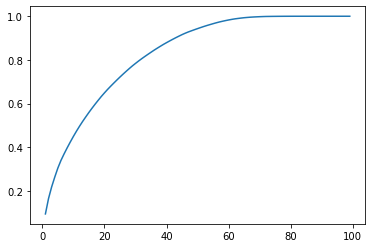

In [266]:
# Scree Plot
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), var_cum)
plt.show()

# AFTER MAKING CHANGE
- 42 ~ 90%
- 51 ~ 95%
- 63 ~ 99%

### Conclusion
Selecting 51 component as it cover `95.31%` variables

###### Again Creating model with 51 components

In [267]:
# Creating instance
pca = PCA(n_components=51, random_state=50)

# Fitting PCA to train dataset
pca.fit(X_train)

PCA(n_components=51, random_state=50)

In [268]:
# Creating list of column name
col_name = list(X_train.columns)
# Creating Dataframe
pcs_df = pd.DataFrame()
# Assiging values
for i in range(len(pca.components_)):
    pcs_df["PC_"+str(i+1)] = pca.components_[i]
pcs_df["Feature"] = col_name
# Checking DataFrame
pcs_df

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0   0.146134 -0.140194  0.122075  0.089157  0.092356 -0.024954 -0.192742   
1   0.186953 -0.144142  0.057265  0.090845  0.111895  0.003330  0.126918   
2  -0.020221  0.008120  0.004875  0.105480  0.076731 -0.005281  0.242207   
3  -0.005628 -0.000470  0.026424  0.123006  0.085504  0.001207  0.242152   
4   0.098115 -0.060963 -0.086102 -0.020265  0.124885 -0.151036 -0.097713   
5   0.137301 -0.070236 -0.172770 -0.035907  0.168849 -0.131166  0.055952   
6   0.047724 -0.016468 -0.115043  0.008729  0.074004 -0.047640  0.067198   
7   0.038464 -0.002257  0.046270 -0.014275  0.023868  0.022194 -0.079562   
8   0.152358 -0.084714 -0.170905 -0.035567  0.190693 -0.182661 -0.023854   
9   0.113865 -0.125089  0.188585  0.103893  0.031670  0.061479 -0.185117   
10  0.136467 -0.127718  0.168325  0.100991  0.020248  0.080362  0.068339   
11  0.022175 -0.011304 -0.045656  0.013340  0.026186  0.038251  0.055526   
12  0.165727 -0.167932  0.235088  0.135639  0.034204  0.094532 -0.074258   
13  0.023812 -0.000476 -0.016334  0.056518  0.025404 -0.002376  0.064061   
14  0.057640 -0.016667  0.057869 -0.022792  0.048269  0.019454 -0.092923   
15  0.001687  0.000018 -0.003214  0.004336  0.019345  0.000030  0.052183   
16  0.232005 -0.185270  0.115720  0.104771  0.132754 -0.011909 -0.068771   
17  0.076663 -0.024109 -0.163686 -0.107684  0.119545 -0.048620 -0.004866   
18  0.115341 -0.033789 -0.239752 -0.139906  0.145308 -0.060206  0.051907   
19  0.045804 -0.005519 -0.134891 -0.054182  0.062139 -0.039489  0.051809   
20  0.126840 -0.037082 -0.272121 -0.161970  0.172171 -0.073269  0.040462   
21  0.060206 -0.033146 -0.021349 -0.030539  0.007849  0.290810  0.018837   
22  0.075026 -0.040687 -0.042311 -0.047446  0.006624  0.350667  0.110370   
23  0.019251 -0.006176 -0.051242 -0.013811  0.011370  0.093539  0.060469   
24  0.088803 -0.048287 -0.050108 -0.053062  0.010253  0.421806  0.100664   
25  0.153907 -0.044509 -0.259992 -0.158743  0.157983  0.108776  0.086836   
26  0.021618 -0.004116  0.060147 -0.020296 -0.005251  0.023535 -0.016669   
27  0.026959  0.003784 -0.047567 -0.016904  0.022510  0.037087  0.035969   
28  0.019232 -0.003423 -0.032418 -0.024380  0.029139  0.027326  0.023343   
29  0.155049  0.013064  0.186059 -0.059040  0.093752 -0.016423  0.007660   
30  0.227260 -0.009177 -0.026242  0.201613  0.119320 -0.006294  0.105996   
31  0.113004  0.053174 -0.167091  0.222930  0.036850 -0.002434  0.136568   
32  0.094718  0.026385 -0.145957  0.205239  0.035353 -0.021889  0.146729   
33  0.067014  0.283636  0.157214 -0.191819  0.006714 -0.041790  0.087563   
34  0.066935  0.226212 -0.173702  0.155871 -0.143318  0.019714 -0.035698   
35  0.075017  0.229336 -0.090831  0.157340 -0.033227  0.046129 -0.120069   
36  0.022342  0.090724 -0.084818  0.039808 -0.096367 -0.007971  0.012493   
37  0.038294  0.203259  0.181072 -0.225456  0.019615 -0.051923  0.106418   
38  0.069238  0.190911 -0.130869  0.171850 -0.064121  0.046662 -0.110026   
39  0.048195  0.167401  0.114283 -0.113067  0.042775 -0.017342  0.049877   
40  0.026351 -0.002082 -0.115287  0.006151  0.056123 -0.056713  0.062151   
41  0.056737  0.182202 -0.123588  0.118324 -0.096793  0.026289 -0.058514   
42  0.067014  0.283636  0.157214 -0.191819  0.006714 -0.041790  0.087563   
43  0.075019  0.263668 -0.085673  0.118942 -0.106526  0.028690 -0.076344   
44  0.176859 -0.053842  0.073766  0.011051 -0.159225 -0.109620 -0.077185   
45  0.199813 -0.048861  0.040945 -0.013794 -0.199415 -0.078337  0.183398   
46 -0.043515  0.026384  0.016041  0.107846  0.077777 -0.043989  0.256007   
47 -0.030426  0.028336  0.009783  0.105367  0.076889 -0.031637  0.277559   
48  0.095196 -0.037829 -0.015219 -0.039517 -0.056734 -0.143668 -0.139186   
49  0.130256 -0.035048 -0.056962 -0.105461 -0.103624 -0.106613 -0.026549   
50  0.027827 -0.004836 -0.007796 -0.028799 -0.034881 -0.020712 -0.054383   
51  0.036272  0.006217  0.029568 -0.009150  0.004889  0.

### Step-7.2 : PCA and Logistic Regression

In [269]:
# Importing Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [270]:
# Taking pca variables
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [271]:
# Checking shape
print(pca_train.shape)
print(pca_test.shape)

(21000, 51)
(9001, 51)


<AxesSubplot:>

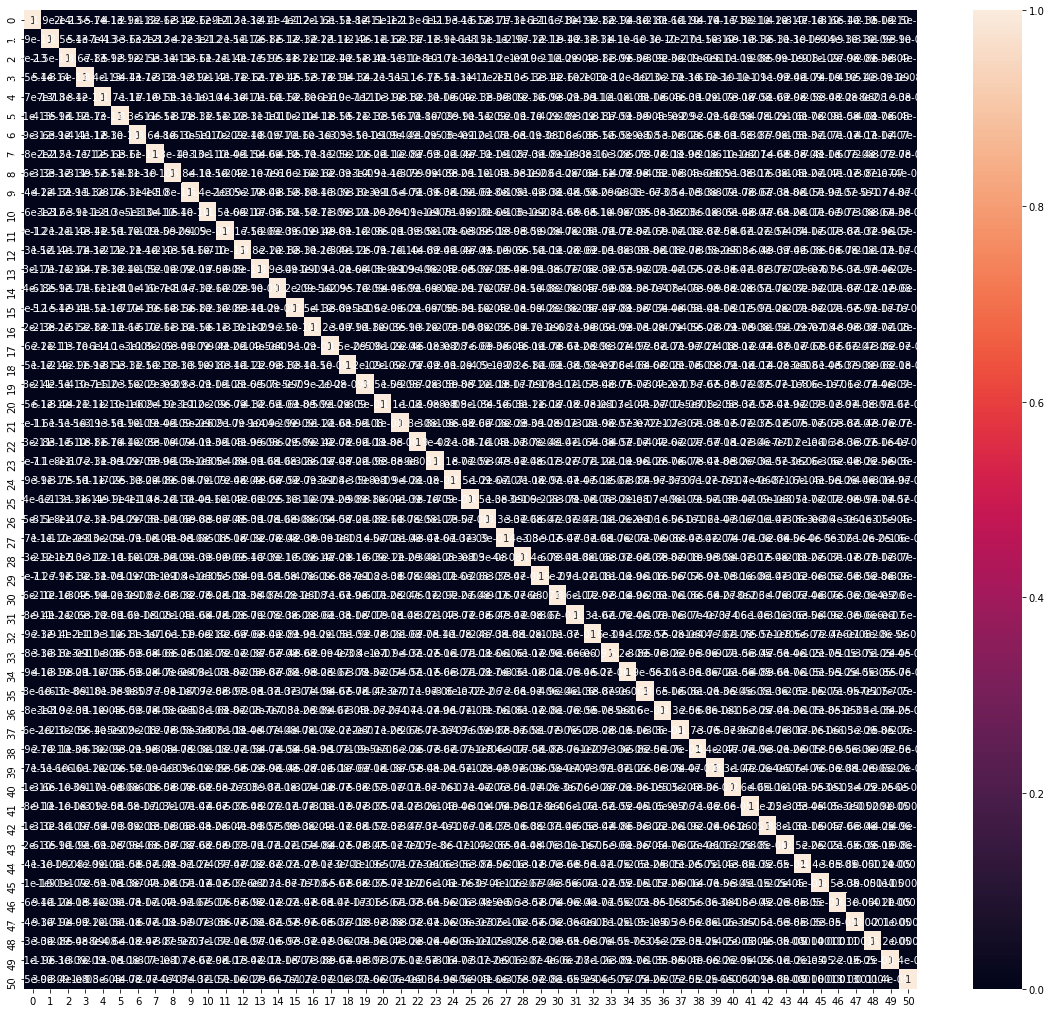

In [272]:
# Checking correlation
corrmat = np.corrcoef(pca_train.transpose())

# Plotting the correlation matrix
plt.figure(figsize = (20,18))
sns.heatmap(corrmat,annot = True)

In [273]:
# Checking max and min correlation
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.00039942796893412325 , min corr:  -0.00013353287778824973


In [274]:
# Creating insatance
log = LogisticRegression()
# Fitting in model
log.fit(pca_train, y_train)

LogisticRegression()

In [275]:
# Importing Library
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [276]:
# Evaluating Train set

# Making prediction
y_pca_pred = log.predict(pca_train)

# Confusion metrix
conf_mx = confusion_matrix(y_pred=y_pca_pred, y_true=y_train)
print("Confusion Matrix is :")
print(conf_mx)

# Accuracy Score
accu_score = accuracy_score(y_pred=y_pca_pred, y_true=y_train)
print("Accuracy Score is : {}".format(round(accu_score,2)))

# ROC_AUC_Score
y_pca_prob = log.predict_proba(pca_train)[:,1]
roc_score = roc_auc_score(y_train, y_pca_prob)
print("ROC_AUC_Score is : {}".format(round(roc_score,2)))

# Sensitivity
sensi = conf_mx[1,1]/(conf_mx[1,0] + conf_mx[1,1])
print("Sensitivity is : {}".format(round(sensi,2)))

# Specificity
speci = conf_mx[0,0]/(conf_mx[0,1] + conf_mx[0,0])
print("Specificity is : {}".format(round(speci,2)))

Confusion Matrix is :
[[19044   209]
 [ 1450   297]]
Accuracy Score is : 0.92
ROC_AUC_Score is : 0.87
Sensitivity is : 0.17
Specificity is : 0.99


#### Hyperparameter tunning

In [277]:
# Importing Library
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

In [278]:
# Creating folds
folds = KFold(n_splits=5, random_state=50, shuffle=True)

# Creating instance
pca = PCA(random_state=50)
log = LogisticRegression()

# Creating pipeline
steps = [("scaler", StandardScaler()), ("pca", pca), ("log", log)]
pipe = Pipeline(steps)

# Creating parameters
params = {'pca__n_components':[42, 51, 63], 
          "log__C":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
          "log__penalty":['l1','l2']}

# Creating Grid Search
model = GridSearchCV(estimator=pipe,
                     cv=folds,
                    param_grid=params,
                    scoring = 'roc_auc',
                    n_jobs = -1,
                    verbose = 1)
# Fitting into model
model.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=50)),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1],
                         'log__penalty': ['l1', 'l2'],
                         'pca__n_components': [42, 51, 63]},
             scoring='roc_auc', verbose=1)

In [279]:
# Cross Validation DataFrame
cv_result = pd.DataFrame(model.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_log__C  \
0        1.454188      0.025317         0.000000        0.000000          0.1   
1        1.810792      0.110079         0.000000        0.000000          0.1   
2        2.210538      0.041745         0.000000        0.000000          0.1   
3        2.079691      0.041670         0.065581        0.014554          0.1   
4        2.277742      0.072526         0.060364        0.002012          0.1   
5        2.805846      0.085512         0.059679        0.007117          0.1   
6        1.515200      0.052918         0.000000        0.000000          0.2   
7        1.794106      0.097424         0.000000        0.000000          0.2   
8        2.191474      0.034098         0.000000        0.000000          0.2   
9        2.088092      0.053800         0.055468        0.004877          0.2   
10       2.302345      0.085832         0.062960        0.004456          0.2   
11       2.875326      0.082424         0.061604        0.001587          0.2   
12       1.410180      0.038549         0.000000        0.000000          0.3   
13       1.756168      0.037686         0.000000        0.000000          0.3   
14       2.193208      0.040217         0.000000        0.000000          0.3   
15       2.087867      0.039772         0.057254        0.007890          0.3   
16       2.297102      0.098840         0.053440        0.003981          0.3   
17       2.870553      0.103004         0.067320        0.007830          0.3   
18       1.457634      0.057241         0.000000        0.000000          0.4   
19       1.717901      0.026453         0.000000        0.000000          0.4   
20       2.177844      0.051000         0.000000        0.000000          0.4   
21       2.119570      0.069698         0.055423        0.005569          0.4   
22       2.325249      0.121648         0.055891        0.004442          0.4   
23       2.905630      0.130023         0.065034        0.007952          0.4   
24       1.450010      0.046937         0.000000        0.000000          0.5   
25       1.718830      0.090858         0.000000        0.000000          0.5   
26       2.214490      0.029457         0.000000        0.000000          0.5   
27       2.088428      0.038107         0.062166        0.006297          0.5   
28       2.299926      0.172516         0.061174        0.009293          0.5   
29       2.847909      0.156703         0.064363        0.015143          0.5   
30       1.496453      0.127215         0.000000        0.000000          0.6   
31       1.766813      0.035261         0.000000        0.000000          0.6   
32       2.213503      0.019363         0.000000        0.000000          0.6   
33       2.113707      0.081763         0.052965        0.004094          0.6   
34       2.317157      0.150391         0.053098        0.003146          0.6   
35       2.902188      0.094683         0.064410        0.008596          0.6   
36       1.464194      0.057378         0.000000        0.000000          0.7   
37       1.732115      0.043949         0.000000        0.000000          0.7   
38       2.207540      0.087641         0.000000        0.000000          0.7   
39       2.058487      0.052394         0.060755        0.008643          0.7   
40       2.345961      0.133033         0.057116        0.007197          0.7   
41       2.924791      0.098741         0.063820        0.003881          0.7   
42       1.440580      0.052493         0.000000        0.000000          0.8   
43       1.763311      0.074415         0.000000        0.000000          0.8   
44       2.189708      0.035722         0.000000        0.000000          0.8   
45       2.108563      0.077691         0.061861        0.001564          0.8   
46       2.325148      0.085396         0.065225        0.017165          0.8   
47       3.041247      0.149207         0.059583        0.004400          0.8   
48       1.539795      0.119689    

In [280]:
# Checking best accuracy score and paramerter
print("Best ACU score : {}".format(model.best_score_))
print("Best hyper Parameter is : {}".format(model.best_params_))

Best ACU score : 0.8715352070003151
Best hyper Parameter is : {'log__C': 0.7, 'log__penalty': 'l2', 'pca__n_components': 63}


#### Creating New Model by taking 63 Component

In [281]:
# Creating model with above parameter
pca_1 = PCA(n_components=63, random_state=50)

# Fitting PCA to train dataset
pca_1.fit(X_train)

# Transforming train dataset
pca_train_1 = pca_1.transform(X_train)

# Transforming test dataset
pca_test_1 = pca_1.transform(X_test)

In [282]:
# Creating Logistic Regresssion
log_1 = LogisticRegression(C=0.7, penalty = 'l2')

# Fitting into model
log_1.fit(pca_train_1, y_train)

LogisticRegression(C=0.7)

In [283]:
# Evaluating Train set

# Making prediction
y_pca_pred_1 = log_1.predict(pca_train_1)

# Confusion metrix
conf_mx = confusion_matrix(y_pred=y_pca_pred_1, y_true=y_train)
print("Confusion Matrix is :")
print(conf_mx)

# Accuracy Score
accu_score = accuracy_score(y_pred=y_pca_pred_1, y_true=y_train)
print("Accuracy Score is : {}".format(round(accu_score,2)))

# ROC_AUC_Score
y_pca_prob = log_1.predict_proba(pca_train_1)[:,1]
roc_score = roc_auc_score(y_train, y_pca_prob)
print("ROC_AUC_Score is : {}".format(round(roc_score,2)))

# Sensitivity
sensi = conf_mx[1,1]/(conf_mx[1,0] + conf_mx[1,1])
print("Sensitivity is : {}".format(round(sensi,2)))

# Specificity
speci = conf_mx[0,0]/(conf_mx[0,1] + conf_mx[0,0])
print("Specificity is : {}".format(round(speci,2)))

Confusion Matrix is :
[[19058   195]
 [ 1409   338]]
Accuracy Score is : 0.92
ROC_AUC_Score is : 0.88
Sensitivity is : 0.19
Specificity is : 0.99


### Step-7.3 : Evaluating PCA and Logistic model

In [284]:
# Evaluating Test set

# Making prediction
y_pca_pred_test = log_1.predict(pca_test_1)

# Confusion metrix
conf_mx = confusion_matrix(y_pred=y_pca_pred_test, y_true=y_test)
print("Confusion Matrix is :")
print(conf_mx)

# Accuracy Score
accu_score = accuracy_score(y_pred=y_pca_pred_test, y_true=y_test)
print("Accuracy Score is : {}".format(round(accu_score,2)))

# ROC_AUC_Score
y_pca_prob_test = log_1.predict_proba(pca_test_1)[:,1]
roc_score = roc_auc_score(y_test, y_pca_prob_test)
print("ROC_AUC_Score is : {}".format(round(roc_score,2)))

# Sensitivity
sensi = conf_mx[1,1]/(conf_mx[1,0] + conf_mx[1,1])
print("Sensitivity is : {}".format(round(sensi,2)))

# Specificity
speci = conf_mx[0,0]/(conf_mx[0,1] + conf_mx[0,0])
print("Specificity is : {}".format(round(speci,2)))

Confusion Matrix is :
[[8034  273]
 [ 379  315]]
Accuracy Score is : 0.93
ROC_AUC_Score is : 0.84
Sensitivity is : 0.45
Specificity is : 0.97


### Step-7.4 : Random Forest Model for selecting feature

In [285]:
# Importing Library
from sklearn.ensemble import RandomForestClassifier

In [286]:
# Using Random Forest to handle class imbalance
# Creating instance
classifier = RandomForestClassifier(class_weight={0:0.1, 1:0.9}, n_jobs=-1, random_state=50)

# Creating parameter
param = {'criterion': ["gini", "entropy"],
    'max_features': [2, 3, 4, 10],
    'n_estimators': [100, 200, 300]
}

# Creating Grid search
rf_model = GridSearchCV(estimator=classifier,
                       param_grid=param,
                       cv=4,
                       scoring = 'roc_auc',
                       n_jobs=-1,
                       verbose=1)

# Fitting into model
rf_model.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [287]:
# Checking best parameter
rf_model.best_params_

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 300}

#### Feature Selection

In [288]:
# Creating Instance
rf_model_1 = RandomForestClassifier(class_weight={0:0.1, 1:0.9},criterion='entropy',max_features=10, n_estimators=300, random_state=50)

# Fitting dataset
rf_model_1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_features=10, n_estimators=300, random_state=50)

In [289]:
# Creating variable
Importance = rf_model_1.feature_importances_

# Creating dataframe
feature = pd.DataFrame()
feature["Feature"] = X_train.columns
feature["Feature_Importance"] = (Importance*100)
# Sorting by Feature Importance
feature = feature.sort_values(by= "Feature_Importance", ascending = False).reset_index(drop=True)
# Checking dataframe'
feature

Feature  Feature_Importance
0             total_ic_mou_8            7.091219
1             total_og_mou_8            4.902131
2           total_rech_amt_8            4.634657
3         last_day_rch_amt_8            3.843832
4      Differ_total_rech_amt            3.466522
5               loc_ic_mou_8            2.768041
6             max_rech_amt_8            2.622393
7        Differ_total_ic_mou            2.339184
8           loc_ic_t2m_mou_8            2.329660
9              roam_og_mou_8            2.163658
10     Differ_total_rech_num            2.130139
11       Differ_total_og_mou            2.042075
12             roam_ic_mou_8            1.850214
13   Differ_last_day_rch_amt            1.804292
14          loc_ic_t2t_mou_8            1.784957
15             Vol_data_mb_8            1.772237
16       Differ_max_rech_amt            1.644722
17        Differ_roam_og_mou            1.508127
18          loc_og_t2m_mou_8            1.504886
19         Differ_loc_ic_mou            1.371558
20     Differ_loc_ic_t2m_mou            1.368589
21              loc_og_mou_8            1.358107
22                       aon            1.320418
23     Differ_loc_ic_t2t_mou            1.252520
24         Differ_std_og_mou            1.220075
25         Differ_offnet_mou            1.189162
26          Differ_onnet_mou            1.181764
27        Differ_roam_ic_mou            1.171363
28              offnet_mou_8            1.139826
29          total_rech_num_8            1.134653
30          loc_og_t2t_mou_8            1.113213
31     Differ_loc_og_t2m_mou            1.097456
32        Differ_Vol_data_mb            1.052222
33         Differ_loc_og_mou            1.029954
34     Differ_loc_og_t2t_mou            1.018271
35               onnet_mou_8            1.003673
36          loc_ic_t2f_mou_8            0.986912
37           max_rech_data_8            0.906084
38         Differ_std_ic_mou            0.894344
39     Differ_std_og_t2t_mou            0.848981
40     Differ_loc_ic_t2f_mou            0.845442
41              std_ic_mou_8            0.840583
42     Differ_std_og_t2m_mou            0.839189
43         fb_user_8_1.0_YES            0.813006
44     Differ_std_ic_t2m_mou            0.812610
45     Differ_std_ic_t2t_mou            0.783614
46         total_rech_data_8            0.782279
47         Differ_spl_og_mou            0.761650
48   Differ_av_rech_amt_data            0.761195
49              std_og_mou_8            0.760845
50                aug_vbc_3g            0.729127
51      Differ_max_rech_data            0.716090
52          std_ic_t2m_mou_8            0.686660
53         Count_data_rech_8            0.686017
54          loc_og_t2f_mou_8            0.638601
55     Differ_loc_og_t2f_mou            0.634639
56          std_og_t2m_mou_8            0.629751
57        av_rech_amt_data_8            0.606129
58     Differ_loc_og_t2c_mou            0.602611
59             Differ_vbc_3g            0.583175
60              fb_user_8_NA            0.569272
61          std_og_t2t_mou_8            0.542551
62          Differ_ic_others            0.536473
63    Differ_Count_data_rech            0.525274
64    Differ_total_rech_data            0.520349
65              spl_og_mou_8            0.503890
66       night_pck_user_8_NA            0.488805
67          std_ic_t2t_mou_8            0.485554
68     Differ_std_ic_t2f_mou            0.426709
69         Differ_spl_ic_mou            0.423598
70         Differ_isd_ic_mou            0.411954
71          Differ_sachet_2g            0.371725
72          Differ_og_others            0.294862
73          loc_og_t2c_mou_8            0.290213
74          std_ic_t2f_mou_8            0.277103
75               ic_others_8            0.276417
76     Differ_std_og_t2f_mou            0.269329
77         Differ_isd_og_mou            0.237286
78              spl_ic_mou_8            0.226076
79         Differ_monthly_3g            0.210529
80              isd_ic_mou_8            0.194428
81 

### Taking Top 30 Feature

In [290]:
# Top 30 Feature
top_30_feature = list(feature["Feature"][:30])
top_30_feature

['total_ic_mou_8',
 'total_og_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'Differ_total_rech_amt',
 'loc_ic_mou_8',
 'max_rech_amt_8',
 'Differ_total_ic_mou',
 'loc_ic_t2m_mou_8',
 'roam_og_mou_8',
 'Differ_total_rech_num',
 'Differ_total_og_mou',
 'roam_ic_mou_8',
 'Differ_last_day_rch_amt',
 'loc_ic_t2t_mou_8',
 'Vol_data_mb_8',
 'Differ_max_rech_amt',
 'Differ_roam_og_mou',
 'loc_og_t2m_mou_8',
 'Differ_loc_ic_mou',
 'Differ_loc_ic_t2m_mou',
 'loc_og_mou_8',
 'aon',
 'Differ_loc_ic_t2t_mou',
 'Differ_std_og_mou',
 'Differ_offnet_mou',
 'Differ_onnet_mou',
 'Differ_roam_ic_mou',
 'offnet_mou_8',
 'total_rech_num_8']

#### Checking correlation

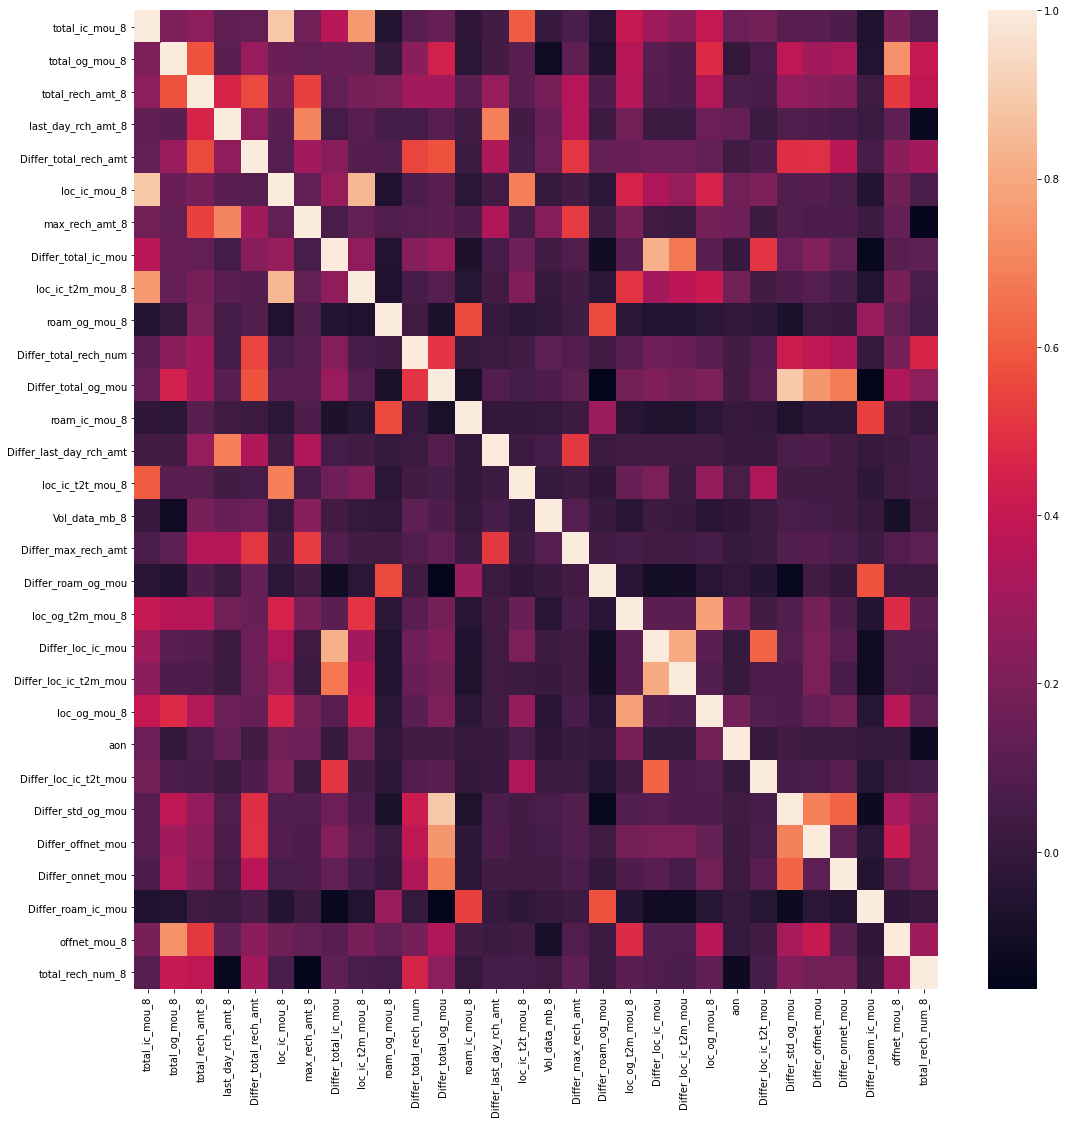

In [291]:
# Heatmap
plt.figure(figsize=(18,18))
sns.heatmap(X_train[top_30_feature].corr())
plt.show()

### Step-7.5 : Logistic Regression for top 30 feature

In [292]:
# Creating folds
folds = KFold(n_splits=5, random_state=50, shuffle=True)

# Creating instance
log_1 = LogisticRegression()

# Creating pipeline
steps = [("scaler", StandardScaler()), ("log", log_1)]
pipe = Pipeline(steps)

# Creating parameters
params = {"log__C":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
          "log__penalty":['l1','l2']}

# Creating Grid Search
model = GridSearchCV(estimator=pipe,
                     cv=folds,
                    param_grid=params,
                    scoring = 'roc_auc',
                    n_jobs = -1,
                    verbose = 1)
# Fitting into model
model.fit(X_train[top_30_feature], y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1],
                         'log__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [293]:
# Checking best accuracy score and paramerter
print("Best ACU score : {}".format(model.best_score_))
print("Best hyper Parameter is : {}".format(model.best_params_))

Best ACU score : 0.8789875382372688
Best hyper Parameter is : {'log__C': 0.1, 'log__penalty': 'l2'}


### Step-7.6 : Evaluating Logistic model for top 30 feature

In [294]:
# Creating Logistic Regresssion
log_2 = LogisticRegression(C=0.1, penalty = 'l2')

# Fitting into model
log_2.fit(X_train[top_30_feature], y_train)

LogisticRegression(C=0.1)

In [295]:
# Evaluating Train set

# Making prediction
y_pca_pred_train_1 = log_2.predict(X_train[top_30_feature])

# Confusion metrix
conf_mx = confusion_matrix(y_pred=y_pca_pred_train_1, y_true=y_train)
print("Confusion Matrix is :")
print(conf_mx)

# Accuracy Score
accu_score = accuracy_score(y_pred=y_pca_pred_train_1, y_true=y_train)
print("Accuracy Score is : {}".format(round(accu_score,2)))

# ROC_AUC_Score
y_pca_prob_train = log_2.predict_proba(X_train[top_30_feature])[:,1]
roc_score = roc_auc_score(y_train, y_pca_prob_train)
print("ROC_AUC_Score is : {}".format(round(roc_score,2)))

# Sensitivity
sensi = conf_mx[1,1]/(conf_mx[1,0] + conf_mx[1,1])
print("Sensitivity is : {}".format(round(sensi,2)))

# Specificity
speci = conf_mx[0,0]/(conf_mx[0,1] + conf_mx[0,0])
print("Specificity is : {}".format(round(speci,2)))

Confusion Matrix is :
[[19080   173]
 [ 1195   552]]
Accuracy Score is : 0.93
ROC_AUC_Score is : 0.88
Sensitivity is : 0.32
Specificity is : 0.99


In [296]:
# Evaluating Test set

# Making prediction
y_pca_pred_test_1 = log_2.predict(X_test[top_30_feature])

# Confusion metrix
conf_mx = confusion_matrix(y_pred=y_pca_pred_test_1, y_true=y_test)
print("Confusion Matrix is :")
print(conf_mx)

# Accuracy Score
accu_score = accuracy_score(y_pred=y_pca_pred_test_1, y_true=y_test)
print("Accuracy Score is : {}".format(round(accu_score,2)))

# ROC_AUC_Score
y_pca_prob_test = log_2.predict_proba(X_test[top_30_feature])[:,1]
roc_score = roc_auc_score(y_test, y_pca_prob_test)
print("ROC_AUC_Score is : {}".format(round(roc_score,2)))

# Sensitivity
sensi = conf_mx[1,1]/(conf_mx[1,0] + conf_mx[1,1])
print("Sensitivity is : {}".format(round(sensi,2)))

# Specificity
speci = conf_mx[0,0]/(conf_mx[0,1] + conf_mx[0,0])
print("Specificity is : {}".format(round(speci,2)))

Confusion Matrix is :
[[7741  566]
 [ 229  465]]
Accuracy Score is : 0.91
ROC_AUC_Score is : 0.87
Sensitivity is : 0.67
Specificity is : 0.93


## Step-8 : Outcome/Report

In [297]:
# Checking Intercept and Coefficient

# Creating variable
intercept = log_2.intercept_.reshape(1,1)
coeff = log_2.coef_.reshape(-1,1)

# Creating DataFrame
incep = pd.DataFrame(data=intercept, columns=["Intercept"])

coefficent = pd.DataFrame()
for i in range(len(top_30_feature)):
    coefficent[top_30_feature[i]] = coeff[i]

# Concatinating
Imp_Feature_Coeff = pd.concat([incep,coefficent], axis=1)
Imp_Feature_Coeff = Imp_Feature_Coeff.T
Imp_Feature_Coeff

0
Intercept               -3.743573
total_ic_mou_8          -1.732206
total_og_mou_8          -0.427497
total_rech_amt_8         0.195758
last_day_rch_amt_8      -0.570274
Differ_total_rech_amt   -0.249105
loc_ic_mou_8             0.167277
max_rech_amt_8           0.137626
Differ_total_ic_mou     -0.331206
loc_ic_t2m_mou_8         0.065381
roam_og_mou_8            0.176841
Differ_total_rech_num   -0.136996
Differ_total_og_mou     -1.397629
roam_ic_mou_8            0.060278
Differ_last_day_rch_amt  0.049687
loc_ic_t2t_mou_8         0.162920
Vol_data_mb_8           -0.880672
Differ_max_rech_amt     -0.086652
Differ_roam_og_mou      -0.367478
loc_og_t2m_mou_8        -0.261409
Differ_loc_ic_mou        0.019704
Differ_loc_ic_t2m_mou    0.021704
loc_og_mou_8            -0.046344
aon                     -0.240216
Differ_loc_ic_t2t_mou    0.063460
Differ_std_og_mou       -0.082481
Differ_offnet_mou        0.931936
Differ_onnet_mou         0.804961
Differ_roam_ic_mou      -0.075703
offnet_mou_8             0.273563
total_rech_num_8        -0.382115

In [298]:
Imp_Feature_Coeff.sort_values(by=0, ascending = False)

0
Differ_offnet_mou        0.931936
Differ_onnet_mou         0.804961
offnet_mou_8             0.273563
total_rech_amt_8         0.195758
roam_og_mou_8            0.176841
loc_ic_mou_8             0.167277
loc_ic_t2t_mou_8         0.162920
max_rech_amt_8           0.137626
loc_ic_t2m_mou_8         0.065381
Differ_loc_ic_t2t_mou    0.063460
roam_ic_mou_8            0.060278
Differ_last_day_rch_amt  0.049687
Differ_loc_ic_t2m_mou    0.021704
Differ_loc_ic_mou        0.019704
loc_og_mou_8            -0.046344
Differ_roam_ic_mou      -0.075703
Differ_std_og_mou       -0.082481
Differ_max_rech_amt     -0.086652
Differ_total_rech_num   -0.136996
aon                     -0.240216
Differ_total_rech_amt   -0.249105
loc_og_t2m_mou_8        -0.261409
Differ_total_ic_mou     -0.331206
Differ_roam_og_mou      -0.367478
total_rech_num_8        -0.382115
total_og_mou_8          -0.427497
last_day_rch_amt_8      -0.570274
Vol_data_mb_8           -0.880672
Differ_total_og_mou     -1.397629
total_ic_mou_8          -1.732206
Intercept               -3.743573

### Buisness Recommendation

#### As the coefficient of "Differ_offnet_mou" and "Differ_onnet_mou" is high
- Telecom Company need to pay attention for charges of call within Same Operator and Other Operator
- By Providing some offers or Reduce Rate

#### For Roaming Call
- Telecom Company have to focus on Roaming Rates
- Those using service in roaming zone by providing some offer or cashback.

#### For Local and STD
- Telecom Company have to focus on Local and STD Call Rates
- By Providing some data pack with call.
- By Providing some offer for those who connect with same service 